# KLASTERYZACJA

## BIBLIOTEKI DO KLASTERYZACJI

In [1]:
"""
DEDYKOWANA BIBLIOTEKA DO KLASTERYZACJI
"""
#!pip install pyclustering

#dokumentacja:
#https://pyclustering.github.io/docs/0.9.0/html/index.html

"""
BIBLIOTEKA DO KLASTERYZACJI - ZMODYFIKOWANE (PÓŁNADZOROWANE K-MEANS) - MOŻNA PODAĆ PARAMETRY WIELKOŚCIOWE KLASTRA
UWAGA - POTRZEBNE ZAINSTALOWANE VISUAL STUDIO 2019 LUB INNY INTERPRETER C++
"""
#!pip install k-means-constrained

"""
SKLEARN JAKO BIBLIOTEKA BAZOWA
"""

"""HDBSCAN
UWAGA - POTRZEBNE ZAINSTALOWANE VISUAL STUDIO 2019 LUB INNY INTERPRETER C++"""
#!pip install hdbscan 

"""
MAPA
"""
#!pip install folium

'\nMAPA\n'

## METODY KLASTERYZACJI

1. Agglomerative Clustering
2. BANG ALGORITHM
3. BIRCH (Balanced Iterative Reducing and Clustering using Hierarchies)
4. BSAS (Basic Sequential Algorithmic Scheme)
5. CLARANS
6. CLIQUE
7. CURE
8. DBSCAN
9. EMA (Expectation-Maximization Algorithm for Gaussian Mixture Model)
10. FCM (Fuzzy C-Means)
11. Genetic clustering algorithm (GA)
12. G-Means algorithm
13. HDBSCAN
14. Hierarchical Sync (HSyncNet)
15. K-Means
16. K-means-constrained
17. K-Medians
18. K-Medoids
19. MBSAS (Modified Basic Sequential Algorithmic Scheme)
20. MiniBatchKMeans
21. OPTICS (Ordering Points To Identify Clustering Structure)
22. ROCK
23. SOM-SC (Self-Organized Feature Map for Simple Clustering)
24. Spectral Clustering
25. Sync
26. SYNC-SOM
27. TTSAS (Two-Threshold Sequential Algorithmic Scheme)
28. X-Means

## PRZYKŁADOWE DANE (GEOLOKALIZACJA PUNKTÓW PH)

In [2]:
import pandas as pd
import numpy as np
import folium
from matplotlib import pyplot as plt
import seaborn as sns
%matplotlib inline
import warnings
warnings.filterwarnings("ignore")

In [3]:
# Dataset do przykładów

account = pd.read_excel('Klasteryzacja.xlsx', sheet_name='Arkusz1')

route = account[['Account','Area','Kontakt','Kontakt 2',
                 'Latitude','Longitude']]

route = route.rename(columns={'Account':'ID',
                              'Area':'KOS',
                              'Kontakt':'PH_podst',
                              'Kontakt 2':'PH_dod',
                              'Latitude':'szer',
                              'Longitude':'dlug'
                             })

route['PH'] = np.where(route['PH_podst']=='KONTAKT BRAK',route['PH_dod'],route['PH_podst'])
route = route[(route['szer']!='#')&(route['dlug']!='#')]

route['szer'] = route['szer'].astype('float')
route['dlug'] = route['dlug'].astype('float')

eda = route[(route['KOS']=='OBSZAR 1')&(route['PH']!='KONTAKT BRAK')]


In [4]:
eda['PH'].unique()

array(['KONTAKT 2', 'KONTAKT 3', 'KONTAKT 4', 'KONTAKT 5', 'KONTAKT 6',
       'KONTAKT 7', 'KONTAKT 8', 'KONTAKT 9'], dtype=object)

In [5]:
# WYBÓR PH 
nr_ph = list(eda['PH'].unique())

wybrany_ph = 5

eda_ph = eda[eda['PH'] == nr_ph[wybrany_ph]].reset_index()
eda_ph.drop(columns=['index'], inplace=True)

eda_ph = eda_ph[['KOS','PH','szer','dlug']]

Punkty PH: KONTAKT 7


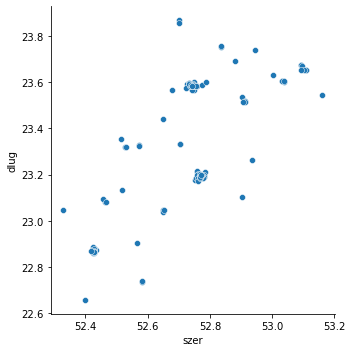

In [6]:
print(f'Punkty PH: {nr_ph[wybrany_ph]}')
sns.relplot(x="szer", y="dlug", data=eda_ph, kind="scatter")

In [7]:
# GENERATING MAP
mapa = folium.Map(location=[eda_ph.szer.mean(),eda_ph.dlug.mean()], zoom_start=9)

colors = {'0': "darkblue", '1': 'pink',"2": "orange", "3": 'gray', "4": "red", "5": "green"}
for ix, row in eda_ph.iterrows():
    szerokosc = row["szer"]
    dlugosc = row["dlug"]
    #cluster = row["cluster"]
    
    #tooltip = f"Cluster: {cluster}" 
    folium.Marker(
            [szerokosc, dlugosc], 
            popup = '<i>Mt. Hood Meadows</i>', 
            #icon = folium.Icon(color = colors[cluster])
            ).add_to(mapa)
mapa

## METODY KLASTERYZACJI


### 1. Agglomerative Clustering  (sklearn, pyclustering)

Film obrazujący proces (od ok 6 min)
https://www.youtube.com/watch?v=XJ3194AmH40

Źródło:
https://www.datanovia.com/en/lessons/agglomerative-hierarchical-clustering/

Agglomerative Clustering jest algorytmem hierarchicznego grupowania obiektów w klastrach opartych na ich podobieństwie. Jest również znany jako AGNES (zagnieżdżanie aglomeracyjne). Algorytm rozpoczyna się od traktowania każdego obiektu jako pojedynczego klastra. Następnie pary klastrów są sukcesywnie łączone, aż wszystkie klastry zostaną połączone w jeden duży klaster zawierający wszystkie obiekty. Rezultatem jest reprezentacja obiektów w postaci drzewa, nazwana dendrogramem

ZASADA DZIAŁANIA

Klastrowanie aglomeracyjne działa w sposób „oddolny”. Oznacza to, że każdy obiekt jest początkowo traktowany jako klaster jednoelementowy (liść). Na każdym etapie algorytmu dwa najbardziej podobne klastry są łączone w nowy większy klaster (węzły). Ta procedura jest powtarzana, aż wszystkie punkty staną się składnikami tylko jednego dużego klastra (korzenia) 

Odwrotnością klastrów aglomeracyjnych jest grupowanie dzielące , które jest również znane jako DIANA ( Analiza Divise ) i działa w sposób „odgórny”. Rozpoczyna się od katalogu głównego, w którym wszystkie obiekty znajdują się w jednym klastrze. Na każdym etapie iteracji najbardziej niejednorodny klaster jest dzielony na dwa. Proces jest powtarzany, aż wszystkie obiekty znajdą się we własnym klastrze (patrz rysunek poniżej)

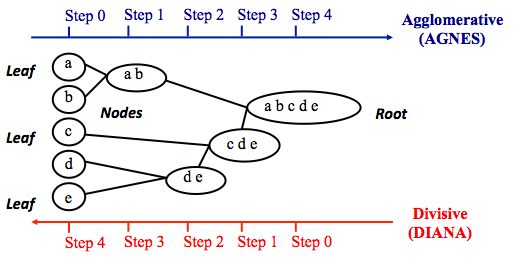

UWAGA - klastrowanie aglomeracyjne jest dobre w identyfikowaniu małych klastrów, klastrowanie dzielące jest dobre w identyfikowaniu dużych klastrów

Istnieje wiele metod aglomeracji klastrów (tj. Metody łączenia). Najczęstsze metody łączenia opisano poniżej.

 - Maksymalne lub całkowite powiązanie : odległość między dwoma klastrami jest definiowana jako maksymalna wartość wszystkich par parami odległości między elementami w klastrze 1 a elementami w klastrze 2. Ma tendencję do tworzenia bardziej zwartych klastrów.
 - Minimalne lub pojedyncze powiązanie : odległość między dwoma klastrami jest definiowana jako minimalna wartość wszystkich par parami odległości między elementami w klastrze 1 a elementami w klastrze 2. Ma tendencję do tworzenia długich, „luźnych” klastrów.
 - Średnie lub średnie powiązanie : odległość między dwoma klastrami jest definiowana jako średnia odległość między elementami w klastrze 1 a elementami w klastrze 2.
 - Powiązanie środka ciężkości : odległość między dwoma skupieniami definiuje się jako odległość między środkiem ciężkości klastra 1 (średni wektor zmiennych długości p) a środkiem ciężkości klastra 2.
 - Metoda minimalnej wariancji Warda : minimalizuje całkowitą wariancję wewnątrz klastra. Na każdym kroku łączy się para klastrów o minimalnej odległości między klastrami.
 
Na każdym etapie procesu grupowania dwa klastry, które mają najmniejszą odległość połączenia, są ze sobą połączone.
Ogólnie preferowane są pełne powiązania i metoda Warda

### Dendrogram
Dendrogramy odpowiadają graficznej reprezentacji drzewa hierarchicznego generowanego

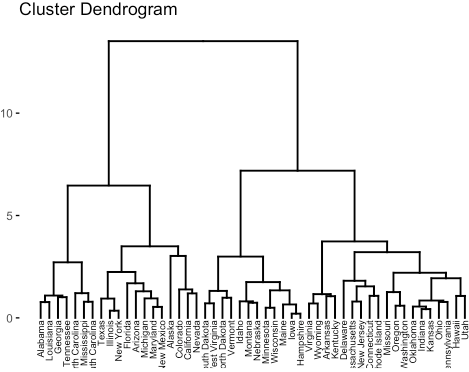

In [8]:
### SKLEARN

# MODEL
from sklearn.cluster import AgglomerativeClustering

agg_cluster = AgglomerativeClustering(n_clusters=7,  # liczba klastrów, musi być None gdy distance_threshold nie jest None
                              affinity='euclidean', # sposób liczenia odległości: “euclidean”, “l1”, “l2”, “manhattan”, “cosine”, or “precomputed”
                              memory=None, # ustawienie ograniczenia pamięci
                              connectivity=None, # wykorzystanie macieży łączności: 
                              compute_full_tree='auto', # zatrzymanie algorytmu jak drzewo ma n klastrów, 
                              linkage='ward', # sposób liczenia odległości: “ward”, “complete”, “average”, “single”
                              distance_threshold=None) # próg odległości powiązania, powyżej którego klastry nie zostaną scalone


 - ward - minimalizuje wariancję łączonych klastrów.
 - average - wykorzystuje średnią z odległości każdej obserwacji z dwóch zbiorów.
 - complete -  lub maksymalne powiązanie wykorzystuje maksymalne odległości między wszystkimi obserwacjami z dwóch zbiorów.
 - single  - wykorzystuje minimalne odległości między wszystkimi obserwacjami z dwóch zbiorów

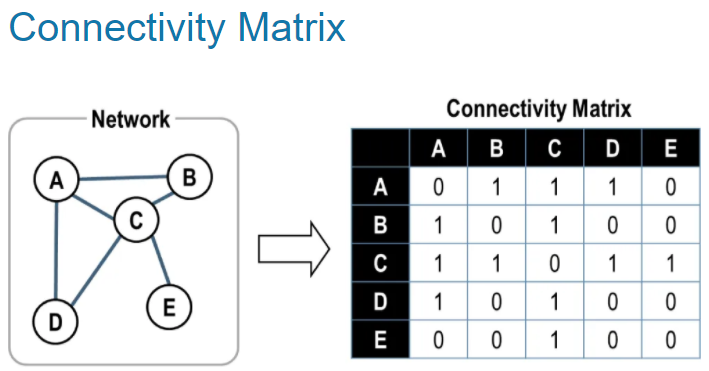

In [9]:
# KLASTERYZACJA
labels = agg_cluster.fit_predict(eda_ph[['szer','dlug']])
klastry = pd.DataFrame(labels, columns=['klaster'])
eda_ph_agg = pd.concat([eda_ph[['szer','dlug']], klastry], axis=1)

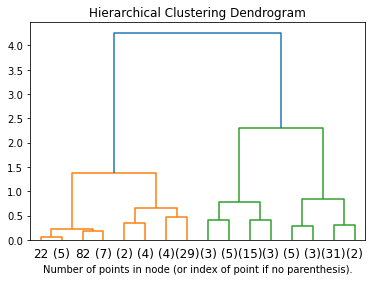

In [10]:
# DENDROGRAM
from scipy.cluster.hierarchy import dendrogram

def plot_dendrogram(model, **kwargs):
    # Create linkage matrix and then plot the dendrogram

    # create the counts of samples under each node
    counts = np.zeros(model.children_.shape[0])
    n_samples = len(model.labels_)
    for i, merge in enumerate(model.children_):
        current_count = 0
        for child_idx in merge:
            if child_idx < n_samples:
                current_count += 1  # leaf node
            else:
                current_count += counts[child_idx - n_samples]
        counts[i] = current_count

    linkage_matrix = np.column_stack([model.children_, model.distances_,
                                      counts]).astype(float)

    # Plot the corresponding dendrogram
    dendrogram(linkage_matrix, **kwargs)

    # setting distance_threshold=0 ensures we compute the full tree.    
model = AgglomerativeClustering(distance_threshold=0, n_clusters=None)
model = model.fit(eda_ph[['szer','dlug']])

plt.title('Hierarchical Clustering Dendrogram')
# plot the top three levels of the dendrogram
plot_dendrogram(model, truncate_mode='level', p=3)
plt.xlabel("Number of points in node (or index of point if no parenthesis).")
plt.show()


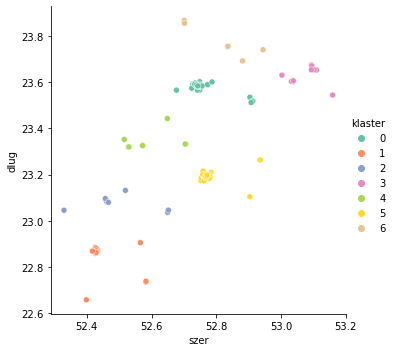

In [11]:
# Wizualizacja klastrów
sns.relplot(x="szer", y="dlug", data=eda_ph_agg, kind="scatter", hue='klaster', palette="Set2" )

In [12]:
# Liczebności klastra
eda_ph_agg['klaster'].value_counts()

klaster
0    33
5    33
1    18
3    14
2     8
4     8
6     6
Name: count, dtype: int64

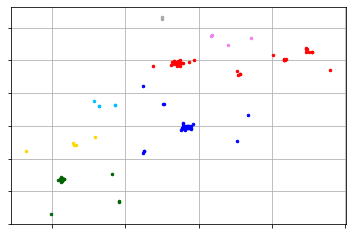

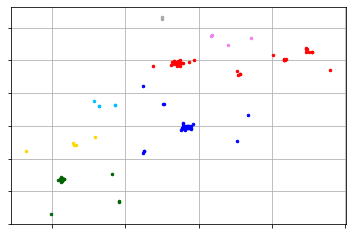

In [13]:
### PYCLUSTERING

# MODEL

from pyclustering.cluster.agglomerative import agglomerative, type_link
from pyclustering.cluster import cluster_visualizer

sample = eda_ph[['szer','dlug']]
agg_list = []
for ix, row in sample.iterrows():
    szer = row["szer"]
    dlug = row["dlug"]
    agg_list.append([szer,dlug])

# create instance of the algorithm that will use ccore library (the last argument)
agglomerative_instance = agglomerative(agg_list,  # dane w postaci listy np.: [[0.1, 0.2], [0.4, 0.5], [1.3, 0.9]]
                                       7,   # liczba klastrów
                                       type_link.CENTROID_LINK, # sposób obliczania podobieństwa: SINGLE_LINK, COMPLETE_LINK,
                                                              #                                 AVERAGE_LINK, CENTROID_LINK
                                       True)  # UŻYWAC SILKINA PYTHONA CZY C++, DOMYŚLNIE FALSE
                                              
# start processing
agglomerative_instance.process()
                                              
# get result and visualize it
ph_agg_clusters = agglomerative_instance.get_clusters()   # ZWRACA LISTĘ KLASTRÓW
visualizer = cluster_visualizer()
visualizer.append_clusters(ph_agg_clusters, agg_list)
visualizer.show()                                              

### 2. BANG CLUSTERING (pyclustering)

Film obrazujący proces:
https://www.youtube.com/watch?v=pblfYK4vuJU

Źródło: https://www.semanticscholar.org/paper/The-BANG-Clustering-System%3A-Grid-Based-Data-Schikuta-Erhart/35d9cfacae35d16d828d971bfcfa0d6b25e180bd

Bang Structure jest metodą, która pracuje grupując punkty zgodnie ze strukturą przestrzeni. BANG przechowuje wzorce leżącej poniżej przestrzeni wartości za pomocą siatki strukturę, która jest nazywana katalogiem grid (podobnie jak Grid-File). Ta struktura (patrz rysunek 1), którą zarządzają wagi, dzieli k-wymiarów wartość przestrzeni w regiony siatki (podprzestrzenie o kształcie prostokątnym). Każda skala reprezentuje jeden atrybut wzoru, a każda pozycja skali przypomina wymiar (k-l) hiperprzestrzeń dzieląca przestrzeń wartości na dwie. Każdy region siatki jest mapowany na jeden blok danych zawierający wzorce, ale
blok danych może być odwzorowywany przez więcej niż jeden region siatki (odwzorowanie l: m). Nazywa się połączenie tych regionów siatki (mapowanie do tego samego bloku danych) region bloku. Przestrzeń wartości rozpięta przez region bloku ma kształt prostokąta.

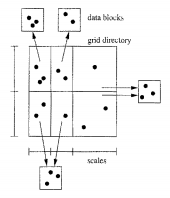

BANG mapuje tylko do pojedynczego bloku danych. Oznacza to, że blokują tylko regiony są administrowane, co skutkuje mniejszym katalogiem siatki niż w przypadku pliku siatki. Strukturę regionów blokowych definiują następujące dwa aksjomaty
- Suma wszystkich podregionów, na które podzielono przestrzeń wartości musi obejmować całą przestrzeń wartości.
- Jeśli przecinają się dwa podregiony, jeden z nich całkowicie się obejmuje inny.

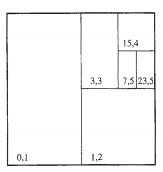

Ogólnie każdy region logiczny jest zdefiniowany przez zbiór regionów, tak że (wypukły) region zawiera inne regiony, które z kolei odejmują od pierwszego regionu. Powstała przestrzeń może być wklęsła. Regiony blokowe są przechowywane w siatce
słowniku. Bloki danych zawierają wzorce odpowiednich regionów logicznych. Całe równoważenie odbywa się w regionach logicznych. Katalog zawiera unikalne krotki binarne regionów blokowych. Sortując te krotki według poziomów nie ma dwuznaczności. Dzięki funkcji mapowania zawsze najmniejszy (największy według numeracji) poziomów. Ta krotka jest przeszukiwana w katalogu. Jeśli „zostanie znaleziony algorytm się kończy, w przeciwnym razie przeszukiwany jest region, który zawiera odpowiedni region siatki. Dlatego, chociaż katalog nie zawiera żadnych informacji o logicznym regionie, poprawne unikalne mapowanie krotek do regionów jest gwarantowane.

Algorytm BANG-Clustering wykorzystuje informacje o blokach z katalogu siatek i odpowiednio grupuje wzory w ich bloki. 
W strukturze BANG można wyróżnić dwa typy sąsiedztwa: 
- normalne sąsiedztwo, czyli sąsiedztwo odpowiednich regionów blokowych 
- wyrafinowane sąsiedztwo,tj. sąsiaduje z odpowiednimi regionami logicznymi. Ponadto stopień sąsiedztwa można zdefiniować przez wymiarowość „stykającego się” obszaru między 2 regionami. 
Ogólnie wymiarowość może wahać się od 0 (punkt) do k-1 (wymiar k-1 hiperpłaszczyzna). W przykładzie pokazanym na rysunku (przypadek dwuwymiarowy) poziom wymiarowości wynosi 0 (punkt) i 1 (krawędź). Istnieje normalne sąsiedztwo na przykład między regionami R2 i R1, R3, R6 i R7 oraz wyrafinowanym sąsiedztwem
między regionami R2 i R1, R6 i R7.
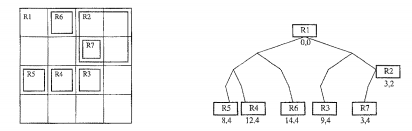
Sąsiedztwo znajduje się poprzez porównanie wartości skali katalogu siatek. Jeśli regiony są na tym samym poziomie, różnice
można określić bezpośrednio. Jeśli poziomy nie są na tym samym poziomie, tym niższy region poziomu musi zostać przekształcony w region wyższego poziomu i porównanie musi być zrobione odpowiednio.


Identyfikator regionu to uporządkowany zestaw krotek. Aby znaleźć potencjalnego sąsiada regiony, w których algorytm uzyskuje dostęp do tych krotek. Aby skutecznie wesprzeć ten krok zaprojektowano nowatorską strukturę administracyjną dla identyfikatorów regionów. Z powodu schematu numeracji regionów siatki wybraliśmy drzewo binarne do przechowywania struktura siatki. Podstawowy schemat pokazano na powyższym rysunku. Podział regionu to bezpośrednio obsługiwany przez schemat drzewa i po prostu znajduje się region zawierający cofającą ścieżkę do głównego regionu (reprezentującego całą przestrzeń wartości). Wysokość drzewa jest określona liczbą poziomów regionu.

DENDROGRAM

Dendrogram jest obliczany bezpośrednio przez algorytm grupowania. Gęstość indeksy wszystkich regionów są obliczane i sortowane w kolejności malejącej. Począwszy od pierwszego regionu (o najwyższym wskaźniku zagęszczenia) wszystkie sąsiednie regiony są określane i klasyfikowane w porządku malejącym (krok 1). Wyszukiwanie sąsiada jest powtarzane dla każdego przetworzonego regionu. Znalezione regiony są umieszczane w dendrogramie na prawo do oryginalnych regionów (krok 2), zgodnie z następującymi zasadami:
- jest sąsiadem R1 z R2 i sąsiadem R2 z R3 i R1> R2> R3, następnie buduj z R1, R2 i R3 klaster (wyszukiwanie sąsiadów zaczynające się od R3)
- jest sąsiadem R1 z R2 i R2 sąsiadem R3 i R1> R2 <R3, następnie buduj z R1, R2 i R3 jako klaster (wyszukiwanie sąsiadów począwszy od R2).

PRZYKŁADY WIZUALIZACJI KLASTERYZACJI

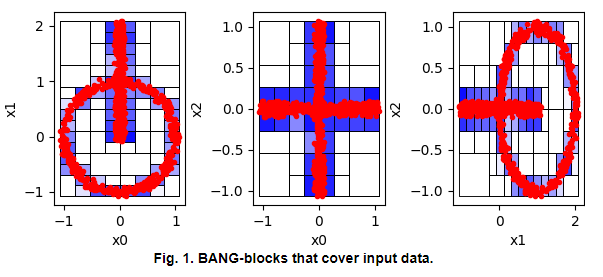

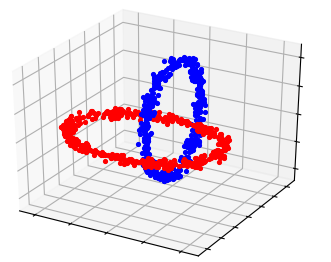

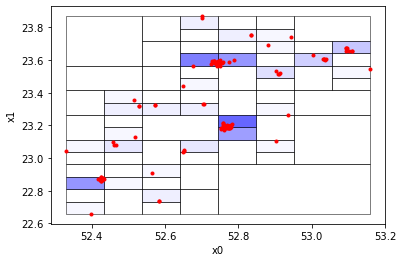

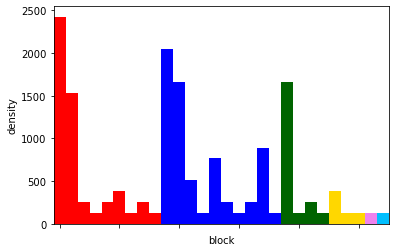

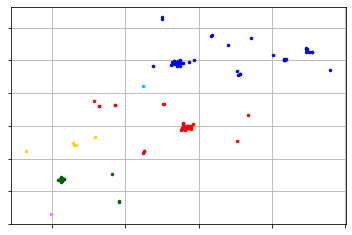

In [14]:
### PYCLASTERING

# MODEL

from pyclustering.cluster.bang import bang, bang_visualizer
from pyclustering.utils import read_sample

sample = eda_ph[['szer','dlug']]
bang_list = []
for ix, row in sample.iterrows():
    szer = row["szer"]
    dlug = row["dlug"]
    bang_list.append([szer,dlug])
    
# Prepare algorithm's parameters.
levels = 8

# Create instance of BANG algorithm.
bang_instance = bang(bang_list,   # dane wejściowe: lista punktów do klasteryzacji
                     levels       # liczba poziomów w drzewie do dzielenia bloków
                    )
bang_instance.process()

# Obtain clustering results.
clusters = bang_instance.get_clusters()
noise = bang_instance.get_noise()
directory = bang_instance.get_directory()
dendrogram = bang_instance.get_dendrogram()

# Visualize BANG clustering results.
bang_visualizer.show_blocks(directory)
bang_visualizer.show_dendrogram(dendrogram)
bang_visualizer.show_clusters(bang_list, clusters, noise)

### 3. BIRCH (Balanced Iterative Reducing and Clustering using Hierarchies)  (sklearn, pyclustering)

Źródło: 
https://towardsdatascience.com/machine-learning-birch-clustering-algorithm-clearly-explained-fb9838cbeed9
https://scikit-learn.org/stable/modules/clustering.html#birch

Istniejące metody grupowania danych nie rozwiązują odpowiednio problemu przetwarzania dużych zbiorów danych z ograniczoną ilością zasobów (tj. Cykle pamięci i procesora). W konsekwencji, wraz ze wzrostem rozmiaru zbioru danych, skalują się one słabo pod względem czasu działania i jakości wyników. Na wyższym poziomie Balanced Iterative Reducing and Clustering using Hierarchies, lub w skrócie BIRCH, radzi sobie z dużymi zbiorami danych, najpierw generując bardziej zwarte podsumowanie, które zachowuje jak najwięcej informacji o dystrybucji, a następnie klastrowanie podsumowania danych zamiast oryginalnego zestawu danych. BIRCH faktycznie uzupełnia inne algorytmy grupowania dzięki temu, że do podsumowania utworzonego przez BIRCH można zastosować różne algorytmy grupowania. BIRCH może obsługiwać tylko atrybuty metryczne (podobne do rodzajów funkcji, które obsługuje KMEANS). Atrybut metryczny to taki, którego wartości mogą być reprezentowane przez jawne współrzędne w przestrzeni euklidesowej (bez zmiennych kategorialnych).

Funkcja klastrowania (CF):
BIRCH próbuje zminimalizować wymagania pamięciowe dużych zbiorów danych, podsumowując informacje zawarte w gęstych regionach jako wpisy Clustering Feature (CF).

Drzewo CF:
Drzewo CF jest bardzo zwartą reprezentacją zbioru danych, ponieważ każdy wpis w węźle liścia nie jest pojedynczym punktem danych, ale podklastrem. Każdy węzeł niebędący liśćmi zawiera najwyżej pozycje B. W tym kontekście pojedynczy wpis zawiera wskaźnik do węzła potomnego i CF utworzoną z sumy CF w podklastrze (podgrupy podklastrów).

Algorytm wstawiania wpisu CF (pojedynczy punkt danych lub podklaster) do drzewa CF.
1. Zidentyfikuj odpowiedni liść: zaczynając od korzenia, zejdź rekurencyjnie w dół po drzewie DF, wybierając najbliższy węzeł potomny zgodnie z wybraną metryką odległości (tj. Odległością euklidesową).
2. Zmodyfikuj liść: Po osiągnięciu węzła liścia znajdź najbliższy wpis i sprawdź, czy może wchłonąć wpis CF bez naruszania warunku progowego. Jeśli tak, zaktualizuj wpis CF, w przeciwnym razie dodaj nowy wpis CF do skrzydła. Jeśli na liściu nie ma wystarczająco dużo miejsca, aby zmieścił się nowy wpis, musimy podzielić węzeł liścia. Dzielenie węzłów odbywa się poprzez wybranie dwóch pozycji, które są najbardziej oddalone od siebie jako zarodki, i redystrybucję pozostałych pozycji na podstawie odległości.
3. Zmodyfikuj ścieżkę do liścia: Po wstawieniu wpisu CF do liścia aktualizujemy informacje o CF dla każdego wpisu nielistego na ścieżce do liścia. W przypadku podziału musimy wstawić nowy wpis nieliścia do węzła nadrzędnego i wskazywać na nowo utworzony liść. Jeśli zgodnie z B rodzic nie ma wystarczającej ilości miejsca, musimy go również podzielić i tak dalej, aż do katalogu głównego.

Klasteryzacja:

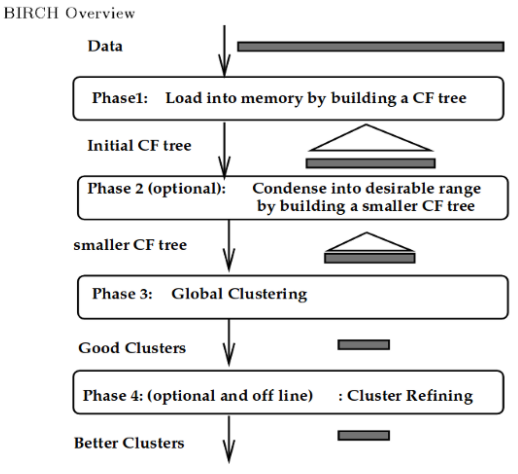


1. Faza: Algorytm rozpoczyna od początkowej wartości progowej, skanuje dane i wstawia punkty do drzewa. Jeśli zabraknie pamięci przed zakończeniem skanowania danych, zwiększa wartość progową i odbudowuje nowe, mniejsze drzewo CF, przez ponowne wstawienie wpisów liści starego drzewa CF do nowego drzewa CF. Po ponownym wstawieniu wszystkich starych wpisów w liście, skanowanie danych i wstawianie do nowego drzewa CF jest wznawiane od miejsca, w którym zostało przerwane.
2. Faza: Biorąc pod uwagę, że niektóre algorytmy grupowania działają najlepiej, gdy liczba obiektów mieści się w pewnym zakresie, możemy pogrupować zatłoczone podgrupy w większe, co daje w rezultacie mniejsze drzewo CF.
3. Faza: Niemal każdy algorytm grupowania można dostosować do kategoryzacji funkcji klastrowania zamiast punktów danych. Na przykład moglibyśmy użyć KMEANS do kategoryzowania naszych danych, jednocześnie czerpiąc korzyści z BIRCH (tj. Minimalizując operacje we / wy).
4. Faza: Do tej pory, chociaż drzewo mogło być wielokrotnie przebudowywane, oryginalne dane były skanowane tylko raz. Faza 4 obejmuje dodatkowe przekazywanie danych w celu skorygowania niedokładności spowodowanych faktem, że algorytm grupowania jest stosowany do zgrubnego podsumowania danych. Faza 4 daje nam również możliwość odrzucenia wartości odstających.

BRICH czy MiniBatchKMeans?

BRICH nie skaluje się zbyt dobrze do danych o dużych wymiarach. Z reguły, jeśli n_features jest większe niż dwadzieścia, ogólnie lepiej jest użyć MiniBatchKMeans.

Jeśli liczba wystąpień danych musi zostać zmniejszona lub jeśli chce się mieć dużą liczbę podklastrów jako krok przetwarzania wstępnego lub w inny sposób, Birch jest bardziej przydatny niż MiniBatchKMeans.

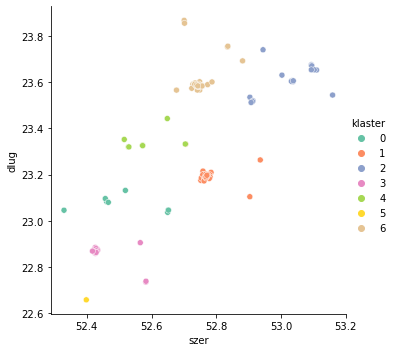

In [15]:
### SKLEARN

# MODEL
from sklearn.cluster import Birch

birch_cluster = Birch(threshold=0.1,           # próg łączenia nowej próbki do najniższego podklastra
                      branching_factor=30,     # maksymalna liczba podklastrów CF w każdym węźle.
                      n_clusters=7,            # liczba klastrów po ostatnim etapie grupowania (None lub int)
                      compute_labels=True,     # obliczanie etykiet dla każdego dopasowania
                      copy=True)               # jeśli ustawione na Fałsz, dane początkowe zostaną nadpisane

# KLASTERYZACJA
labels = birch_cluster.fit_predict(eda_ph[['szer','dlug']])
klastry = pd.DataFrame(labels, columns=['klaster'])
eda_ph_birch = pd.concat([eda_ph[['szer','dlug']], klastry], axis=1)

# Wizualizacja klastrów
sns.relplot(x="szer", y="dlug", data=eda_ph_birch, kind="scatter",hue='klaster', palette="Set2" )

In [16]:
eda_ph_birch['klaster'].value_counts()

klaster
6    34
1    34
2    19
3    17
0     8
4     7
5     1
Name: count, dtype: int64

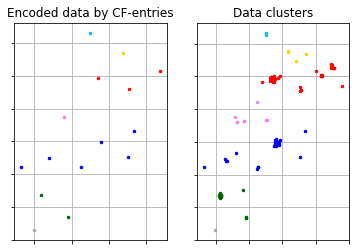

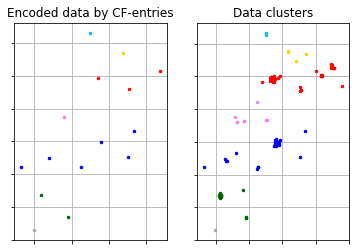

In [17]:
### PYCLASTERING

# MODEL

sample = eda_ph[['szer','dlug']]
birch_list = []
for ix, row in sample.iterrows():
    szer = row["szer"]
    dlug = row["dlug"]
    birch_list.append([szer,dlug])
    
from pyclustering.cluster.birch import birch
from pyclustering.cluster import cluster_visualizer

# Create BIRCH algorithm
birch_instance = birch(birch_list,                # dataset
                        7,                        # liczba klastów
                        branching_factor = 30,    # maksymalna liczba podklastrów CF w każdym węźle.
                        max_node_entries = 200,   # maksymalna wielkość liścia  w CF-Tree
                        diameter = 0.1,           # Średnica wejścia CF stosowana do konstrukcji CF-Tree
                        entry_size_limit = 500,   # Maksymalna liczba wpisów, które można przechowywać w drzewie CF
                        diameter_multiplier = 1.5, # Mnożnik używany do zwiększania średnicy po przekroczeniu parametru „entry_size_limit”
                        ccore = False )            # # UŻYWAC SILKINA PYTHONA CZY C++, 

# Cluster analysis
birch_instance.process()

# Obtain results of clustering
clusters = birch_instance.get_clusters()

# Obtain information how does the 'Lsun' sample is encoded in the CF-tree.
cf_entries = birch_instance.get_cf_entries()
cf_clusters = birch_instance.get_cf_cluster()
cf_centroids = [entry.get_centroid() for entry in cf_entries]

# Visualize allocated clusters
visualizer = cluster_visualizer(2, 2, titles=["Encoded data by CF-entries", "Data clusters"])
visualizer.append_clusters(cf_clusters, cf_centroids, canvas=0)
visualizer.append_clusters(clusters, birch_list, canvas=1)
visualizer.show()

### 4. BSAS (Basic Sequential Algorithmic Scheme)  (pyclastering)

Źródła:
http://cs.joensuu.fi/pages/oili/PR/?a=Some__Material&b=Sequential__Clustering
https://perso.univ-st-etienne.fr/me63854h/enseignements/M1_DA_14/M1_da_clustering.pdf  (od str 36)
https://users.cs.northwestern.edu/~pardo/courses/eecs349/lectures/NU%20EECS%20349%20Fall%2009%20topic%206%20-%20clustering.pdf 
(od str 10)

Algorytm ma dwa obowiązkowe parametry: maksymalną dopuszczalną liczbę klastrów i próg niepodobieństwa, czyli innymi słowy maksymalną odległość między punktami. Metrykę odległości można również określić za pomocą parametrów „metrycznych”, domyślnie używana jest odległość „Manhattan”. 

W tym algorytmie każdy wektor danych jest brany pod uwagę tylko raz, a liczba klastrów nie jest znana a priori. Jednak maksymalna liczba klastrów q jest ustalana z góry. Niech d (x, C) oznacza odległość między wektorem danych x a klastrem C. Ponadto q jest dopuszczalnym progiem niepodobieństwa.
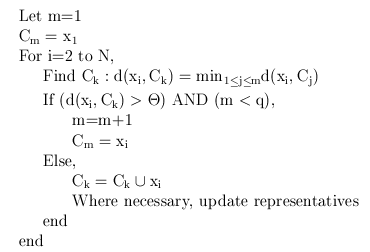

Właściwości algorytmu:
Kolejność prezentacji danych odgrywa ważną rolę w wynikach grupowania pod względem liczby klastrów, a także samych klastrów
• W BSAS decyzja dla wektora x jest podejmowana przed finałem tworzenie klastrów
• BSAS wykonuje pojedyncze przejście na danych: jego złożoność wynosi O (N)
• Jeśli klastry są reprezentowane przez przedstawicieli punktów, preferowane są zwarte klastry

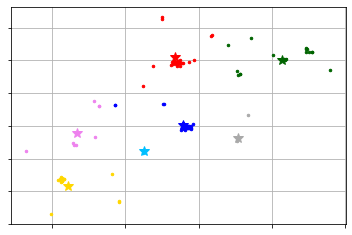

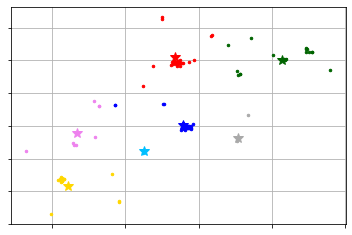

In [18]:
### PYCLASTERING

# MODEL

sample = eda_ph[['szer','dlug']]
bsas_list = []
for ix, row in sample.iterrows():
    szer = row["szer"]
    dlug = row["dlug"]
    bsas_list.append([szer,dlug])
    
from pyclustering.cluster.bsas import bsas, bsas_visualizer

# Create instance of BSAS algorithm.
bsas_instance = bsas(bsas_list,       # dataset
                     7,               # liczba klastrów
                     0.1)             # treshold
bsas_instance.process()

# Get clustering results.
clusters = bsas_instance.get_clusters()
representatives = bsas_instance.get_representatives()
# Display results.
bsas_visualizer.show_clusters(bsas_list, clusters, representatives)

### 5. CLARANS (pyclastering)

Źródła:
http://www.cs.ecu.edu/dingq/CSCI6905/readings/CLARANS.pdf
https://medium.com/analytics-vidhya/partitional-clustering-using-clarans-method-with-python-example-545dd84e58b4

Algorytm przedstawia kompromis między kosztem a efektywnością wykorzystania próbek do tworzenia klastrów.
1. Losowo wybiera k obiektów w zestawie danych jako bieżące medoidy. Następnie losowo wybiera bieżącą medoidę x i obiekt y, który nie jest jednym z bieżących medoidów.
2. Sprawdza następujący stan: Czy zastąpienie x przez y może poprawić kryterium błędu bezwzględnego? Jeśli tak, następuje wymiana. CLARANS przeprowadza takie losowe wyszukiwanie l razy. Zbiór aktualnych medoidów po l krokach jest uważany za lokalny optimum.
CLARANS powtarza ten losowy proces m razy i zwraca najlepszy lokalny optymalny jako wynik końcowy.

Proces:
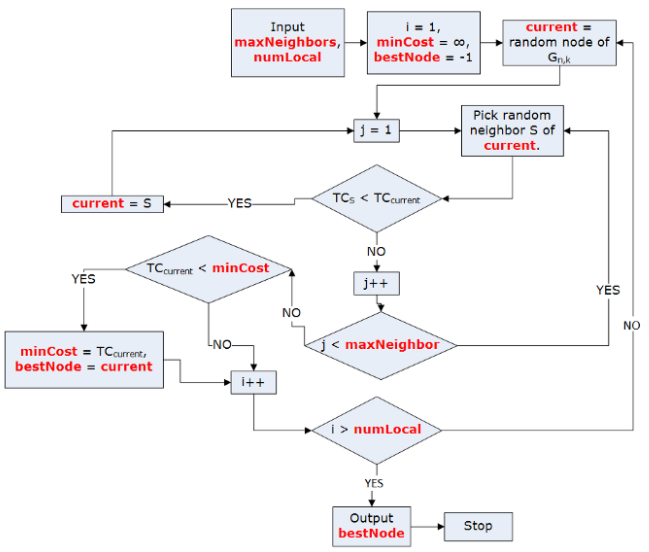

Wyjaśnienie:
Algorytm wymaga numlocal (ilość iteracji do rozwiązania problemu), maxneighbor (maksymalna liczba badanych sąsiadów) i nie. klastrów do utworzenia (k) jako dane wejściowe.
Następnie rozpoczyna się iteracja, i jest ustawiane na 1, przed którym minimalny koszt (który jest kosztem optymalnym) jest ustawiony na nieskończony, a bestnode (optymalne medoidy) jest ustawiany na pustą krotkę.
Teraz k losowych punktów danych jest wybieranych jako bieżące medoidy, a klastry są tworzone przy użyciu tych punktów danych (odległość euklidesowa może być użyta do znalezienia najbliższej medoidy w celu utworzenia klastrów).
Następnie rozpoczyna się nowa pętla, w której j jest ustawiane na 1. Losowy bieżący medoid jest wybierany, a losowy kandydat (losowy sąsiad) punkt danych jest wybierany do zastąpienia bieżącą medoidą. Jeśli zastąpienie kandydującego punktu danych daje niższy całkowity koszt (który jest sumą odległości między wszystkimi punktami w klastrach z ich odpowiednimi medoidami) niż bieżący medoid, wówczas następuje zamiana. Jeśli zamiana zostanie wykonana, j nie jest zwiększana, w przeciwnym razie j = j +1.
Gdy j> maxneighbor, pobierane są bieżące medoidy, a ich całkowity koszt jest porównywany z mincost. Jeśli TotalCost jest mniejszy niż mincost, Bestnode jest aktualizowany jako bieżące medoidy.
i jest następnie zwiększane, a jeśli jest większe niż numlocal, to Bestnode jest podawany jako wyjście, w przeciwnym razie cały proces jest powtarzany.

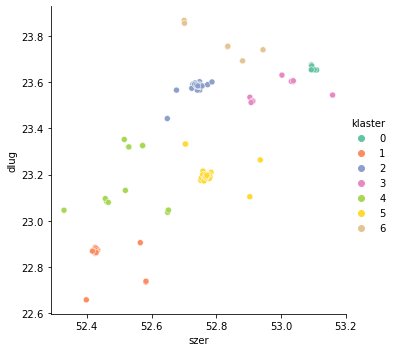

In [19]:
### PYCLASTERING

# MODEL

sample = eda_ph[['szer','dlug']]
clarans_list = []
for ix, row in sample.iterrows():
    szer = row["szer"]
    dlug = row["dlug"]
    clarans_list.append([szer,dlug])
    
from pyclustering.cluster.clarans import clarans
from pyclustering.cluster import cluster_visualizer
from pyclustering.utils import timedcall

clarans_instance = clarans(clarans_list, # dataset
                           7,            # liczba klastrów
                           6,            # liczba iteracji
                           4)            # maksymalna liczba badanych sąsiadów

#calls the clarans method 'process' to implement the algortihm
clarans_instance.process()

#returns the clusters 
clusters = clarans_instance.get_clusters()

#returns the mediods 
medoids = clarans_instance.get_medoids()


# dodanie klastra do df
clarans_obj = pd.DataFrame(clarans_list, columns=['szer','dlug']).reset_index()
clarans_obj['klaster'] = 0

def add_cluster(ind) :   
    for i in range(len(clusters)):
        if ind in clusters[i]:
            return i
        
clarans_obj['klaster'] = clarans_obj['index'].apply(lambda x: add_cluster(x))

# Wizualizacja klastrów
sns.relplot(x="szer", y="dlug", data=clarans_obj, kind="scatter", hue='klaster', palette="Set2" )

In [20]:
clarans_obj['klaster'].value_counts()

klaster
5    35
2    30
1    18
4    13
3    11
0     7
6     6
Name: count, dtype: int64

### 6. CLIQUE (pyclastering)

Źródła:

https://www.youtube.com/watch?v=4HvB9ErEbTU

https://link.springer.com/article/10.1007/s00453-019-00625-1

https://github.com/georgekatona/Clique - kod bez instalacji biblioteki

CLIQUE to algorytm grupowania podprzestrzeni wykorzystujący podejście oddolne w celu znalezienia wszystkich klastrów we wszystkich podprzestrzeniach. Rozpoczyna badanie podprzestrzeni jednowymiarowych i łączy je, aby obliczyć te z wyższych wymiarów. Wykorzystuje właściwość domknięcia w dół, aby osiągnąć lepszą wydajność, biorąc pod uwagę podprzestrzenie tylko wtedy, gdy cała jego projekcja wymiarowa k-1 zawiera klastry.

W kontekście algorytmu klastry są obszarami gęstymi. Dzieli przestrzeń cech na równe części xsi w każdym wymiarze, gdzie przecięcie jednego przedziału z każdego wymiaru nazywa się jednostką. Jeśli jednostka zawiera więcej niż części tau wszystkich punktów danych, jest to zwarta jednostka. Klastry to maksymalne zbiory połączonych gęstych jednostek. Na przykład na rysunku 1 gęsty region A i gęsty obszar B są połączone, dlatego A U B jest klastrem.

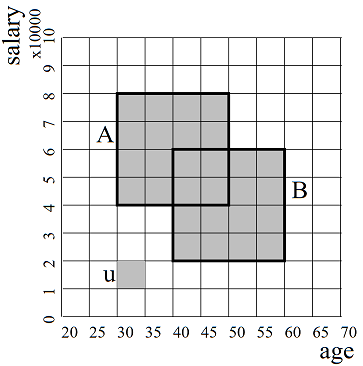


#### Silne strony
CLIQUE służy nie tylko do wykrywania klastrów, ale także do identyfikowania podprzestrzeni, które zawierają klastry w tym samym czasie. Jest szybki i wykorzystuje stosunkowo proste podejście do znajdowania klastrów. Został wprowadzony w 1998 roku z motywem znalezienia automatycznego algorytmu podprzestrzeni bez konieczności odgadywania przez użytkownika podprzestrzeni, które mogą zawierać interesujące klastry.

#### Słabości
Jakość wyników w dużym stopniu zależy od parametrów wejściowych xsi i tau. Ponieważ próg gęstości jest stały we wszystkich wymiarach, wymagałoby to, aby punkty danych miały tę samą gęstość w wysokiej i niskiej wymiarowości, aby znaleźć interesujące klastry we wszystkich podprzestrzeniach z tym samym tau. Położenie linii siatki również ma ogromne znaczenie dla powstałych klastrów.

Amount of clusters: 3


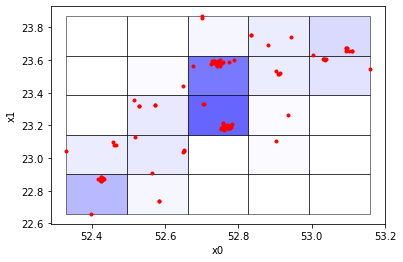

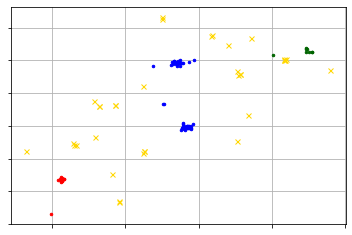

In [21]:
### PYCLASTERING

# MODEL

sample = eda_ph[['szer','dlug']]
clique_list = []
for ix, row in sample.iterrows():
    szer = row["szer"]
    dlug = row["dlug"]
    clique_list.append([szer,dlug])

from pyclustering.cluster.clique import clique, clique_visualizer

# create CLIQUE algorithm for processing
intervals = 5  # defines amount of cells in grid in each dimension
threshold = 6   # lets consider each point as non-outlier
clique_instance = clique(clique_list, # dataframe
                         intervals,   # ilość przedziałów w każdym wymiarze definiującym bloki
                         threshold)   # ilość punktów, które formują blok

# start clustering process and obtain results
clique_instance.process()
clusters = clique_instance.get_clusters()  # allocated clusters
noise = clique_instance.get_noise()     # points that are considered as outliers (in this example should be empty)
cells = clique_instance.get_cells()     # CLIQUE blocks that forms grid
print("Amount of clusters:", len(clusters))
# visualize clustering results
clique_visualizer.show_grid(cells, clique_list)    # show grid that has been formed by the algorithm
clique_visualizer.show_clusters(clique_list, clusters, noise)  # show clustering results

### 7. CURE (Clustering using REpresentatives) (pyclastering)

Źródło:

https://en.wikipedia.org/wiki/CURE_algorithm

https://www.geeksforgeeks.org/basic-understanding-of-cure-algorithm/

Algorytm grupowania o nazwie CURE, jest bardziej odporny na wartości odstające i identyfikuje klastry o niesferycznych kształtach i szerokich różnicach wielkości. CURE osiąga to, reprezentując każdy klaster za pomocą określonej stałej liczby punktów, które są generowane przez wybranie dobrze rozproszonych punktów z klastra, a następnie zmniejszanie ich w kierunku środka klastra o określony ułamek. Posiadanie więcej niż jednego reprezentatywnego punktu na klaster pozwala CURE na dobre dostosowanie się do geometrii niekulistych kształtów, a kurczenie pomaga tłumić skutki wartości odstających. Do obsługi dużych baz danych CURE wykorzystuje kombinację losowego próbkowania i partycjonowania. Losowa próbka pobrana ze zbioru danych jest najpierw podzielona na partycje, a każda partycja jest częściowo zgrupowana. Częściowe klastry są następnie grupowane w drugim przejściu, aby uzyskać pożądane klastry. Losowe próbkowanie i partycjonowanie umożliwiają CURE nie tylko przewyższanie istniejących algorytmów, ale także dobre skalowanie dla dużych baz danych bez poświęcania jakości klastrowania.


 - Jest to technika grupowania oparta na hierarchii, która przyjmuje punkt pośredni między ekstremami opartymi na centroidie i punktach wszechpunktowych. Klastrowanie hierarchiczne to rodzaj klastra, który zaczyna się od pojedynczego klastra punktowego i przechodzi w celu scalenia z innym klastrem, aż do utworzenia żądanej liczby klastrów.
 - Służy do identyfikacji sferycznych i niesferycznych klastrów.
 - Jest to przydatne do odkrywania grup i identyfikowania interesujących rozkładów w danych bazowych.
 - Zamiast używać jednego punktu centroidy, jak w większości algorytmów eksploracji danych, CURE wykorzystuje zestaw dobrze zdefiniowanych punktów reprezentatywnych do efektywnej obsługi klastrów i eliminowania wartości odstających.
 
KROKI:
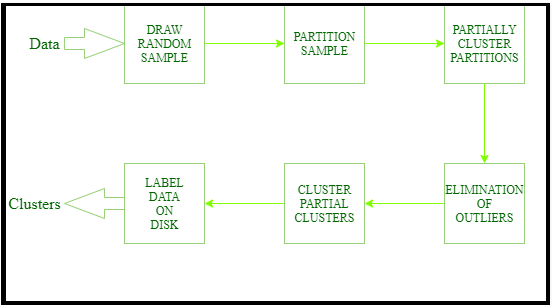

Procedura:
1. Wybierz docelową liczbę próbek „gfg”.
2. Wybierz dobrze rozproszone punkty „gfg” w klastrze.
3. Te rozproszone punkty są zmniejszane do środka ciężkości.
4. Punkty te są używane jako reprezentacje klastrów i stosowane w podejściu „Dmin” do łączenia klastrów. W metodzie scalania skupień Dmin (odległość minimalna) obliczana jest minimalna odległość od rozproszonego punktu wewnątrz próbki „gfg” i punktów na zewnątrz „gfg sample. Punkt mający najmniejszą odległość od rozproszonego punktu wewnątrz próbki, w porównaniu z innymi punktami, jest brany pod uwagę i włączany do próbki.
5. Po każdym takim scaleniu zostaną wybrane nowe punkty próbkowania reprezentujące nowy klaster.
6. Łączenie klastrów zostanie zatrzymane do momentu osiągnięcia celu, powiedzmy „k”.
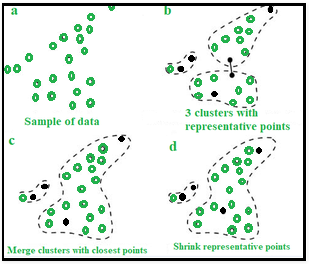

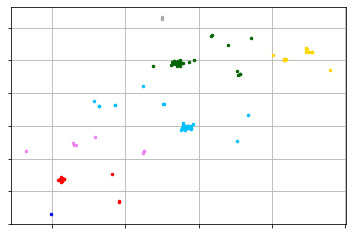

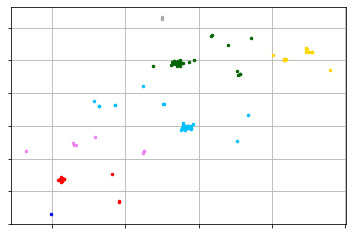

In [22]:
### PYCLUSTERING

# MODEL

sample = eda_ph[['szer','dlug']]
cure_list = []
for ix, row in sample.iterrows():
    szer = row["szer"]
    dlug = row["dlug"]
    cure_list.append([szer,dlug])
    
from pyclustering.cluster import cluster_visualizer
from pyclustering.cluster.cure import cure

# Allocate clusters.
cure_instance = cure(cure_list,            # dataset
                    number_cluster = 7,    # liczba klastrów do znalezienia
                    number_represent_points = 10,  # liczba reprezentantów w klastrze
                    compression = 0.5)     # współczynnik scalania (przedział 0-1)

cure_instance.process()
clusters = cure_instance.get_clusters()

# Visualize allocated clusters.
visualizer = cluster_visualizer()
visualizer.append_clusters(clusters, cure_list)
visualizer.show()

### 8. DBSCAN (sklearn, pyclastering)

Źródło: 
https://scikit-learn.org/stable/modules/clustering.html#dbscan

https://towardsdatascience.com/dbscan-clustering-explained-97556a2ad556

Jest to algorytm grupowania gęstościowego, który skupia się na punktach i identyfikuje wszystkie punkty nienależące do klastra jako wartości odstające. 

Grupowanie gęstościowe polega na budowaniu segmentów na podstawie informacji o zagęszczeniu obserwacji w przestrzeni. Poprzez zagęszczenie należy rozumieć odległości dzielące poszczególne obserwacje w danym obszarze. Poniżej kilka istotnych informacji na jego temat:

1. Najlepiej sprawdza się przy identyfikacji segmentów o nieregularnych (niewypukłych) kształtach.
2. Nie umożliwia definiowania liczby powstałych grup (liczbę grup można częściowo zmieniać poprzez zmianę parametrów modelu).
3. Wymaga zdefiniowania minimalnej liczby obserwacji potrzebnych do zbudowania grupy.
4. Wymaga zdefiniowania minimalnej odległości epsilon, która definiuje sąsiada.
5. Daje możliwość budowania grup o różnych (nieregularnych) kształtach (brak założenia o sferyczności grup, tak, jak w przypadku algorytmu k-średnich).
6. Nie wszystkie obserwacje muszą zostać przypisane do grup. Obserwacje niespełniające zakładanych kryteriów są uznawane za obserwacje odstające.
7. W przypadku przedstawicieli tej grupy algorytmów kluczowy jest dobór odpowiednich parametrów modelu. Choć parametrów nie ma wiele, to należy dobrać je w taki sposób, by powstała „odpowiednia” liczba grup i obserwacje nietypowe nie stanowiły znaczącej części zbioru.

#### DBSCAN – najważniejsze informacje

DBSCAN posiada dwa główne parametry wejściowe, od których ustawienia zależy powodzenie procesu grupowania:

1. epsilon – promień sąsiedztwa, czyli minimalna odległość dzieląca dwie obserwacje konieczna, by zostały one uznane za sąsiadów.
2. min_samples – minimalna liczba obserwacji potrzebna by wybrana obserwacja została uznana za punkt centralny danej grupy (punkt centralny również jest liczony).

Schemat działania algorytmu:
1. Dla każdej obserwacji znajdujemy jego sąsiadów, bliższych niż założona wartość epsilon.
2. Każda obserwacja, która ma co najmniej min_samples sąsiadów w odległości mniejszej niż epsilon, nazywana jest punktem centralnym.
3. Wszystkie obserwacje spełniające kryteria opisane w punkcie 2 są ze sobą łączone w jedną grupę.
4. Obserwacje, które nie są punktami centralnymi, a znajdują się w odległości epsilon, zostają przyłączone do istniejących grup.
5. Algorytm kończy działanie:
    1. Obserwacje, które należą do grup, lecz w ich zasięgu epsilon nie znajduje się żadna nowa obserwacja, nazywane są obserwacjami granicznymi danej grupy.
    2. Wszystkie obserwacje, które nie zostały przyłączone do żadnej z grup, stają się obserwacjami odstającymi.
    
#### Wady i zalety
Stosując algorytm DBSCAN warto mieć również na uwadze zarówno wszystkie jego ograniczenia, jak i mocne strony.

Zalety:
1. Odporny na wpływ obserwacji odstających.
2. Znakomicie radzi sobie z grupami o niewypukłym kształcie.
3. Daje dobre rezultaty – zachowując przy tym relatywnie szybkie działanie.
4. Daje możliwość definiowania wielu miar odległości – jest to problemem w przypadku np. k-średnich.

Wady:
1. Nie daje możliwości definiowania a priori liczby segmentów – liczba segmentów zależy od liczby obserwacji i dobranych parametrów.
2. Dobór odpowiednich parametrów bywa dosyć problematyczny – ich optymalizacja bywa długa i uciążliwa, gdyż nie ma jednej sprawdzonej metody.

####  Uwaga:
Może być wymagana ustandaryzacja/ skalowanie / normalizacja danych do uzyskania dobrych wyników.

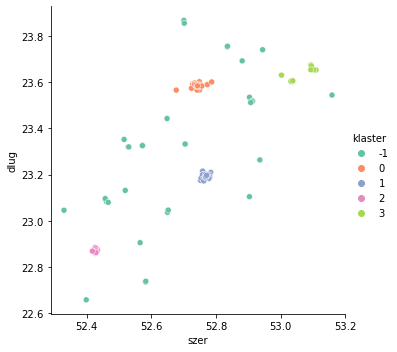

In [23]:
### SKLEARN

# MODEL

from sklearn.cluster import DBSCAN

sk_dbscan = eda_ph[['szer','dlug']]


sk_dbscan_cluster = DBSCAN(
    eps = 0.1,                    # ODLEGŁOŚĆ
    metric='euclidean',          # METRYKA
    min_samples = 10,            # WIELKOŚĆ PRÓBKI
    n_jobs = -1)

# KLASTERYZACJA
clusters = sk_dbscan_cluster.fit_predict(sk_dbscan)
klastry = pd.DataFrame(clusters, columns=['klaster'])
sk_dbscan = pd.concat([sk_dbscan, klastry], axis=1)

# WIZUALIZACJA
sns.relplot(x="szer", y="dlug", data=sk_dbscan, kind="scatter", hue='klaster', palette="Set2" )

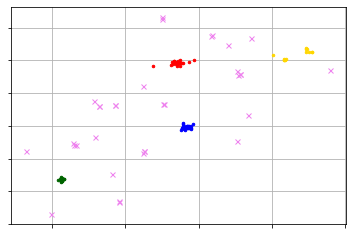

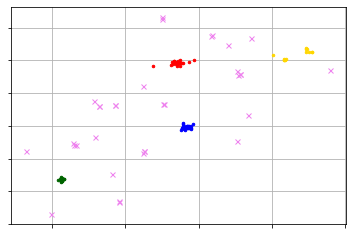

In [24]:
### PYCLUSTERING

from pyclustering.cluster.dbscan import dbscan
from pyclustering.cluster import cluster_visualizer

sample = eda_ph[['szer','dlug']]
dbscan_list = []
for ix, row in sample.iterrows():
    szer = row["szer"]
    dlug = row["dlug"]
    dbscan_list.append([szer,dlug])


# Create DBSCAN algorithm.
dbscan_instance = dbscan(dbscan_list, # dataset
                         0.1,         # odległość (eps)
                         10)          # liczba sąsiadów

# Start processing by DBSCAN.
dbscan_instance.process()

# Obtain results of clustering.
clusters = dbscan_instance.get_clusters()
noise = dbscan_instance.get_noise()

# Visualize clustering results
visualizer = cluster_visualizer()
visualizer.append_clusters(clusters, dbscan_list)
visualizer.append_cluster(noise, dbscan_list, marker='x')
visualizer.show()

### 9. EMA (Expectation-Maximization Algorithm for Gaussian Mixture Model) (sklearn, pyclustering)

Źródło:

https://www.jeremyjordan.me/gaussian-mixed-models/

#### Miękkie grupowanie danych. 
Formalnie grupowanie miękkie (znane również jako grupowanie rozmyte) jest grupowaniem postaci, w którym obserwacje mogą należeć do wielu skupień. 

Proces przebiega następująco:
1. Określ liczbę klastrów, na które chcesz podzielić zbiór danych.
2. Zdefiniuj każdy klaster, generując model Gaussa.
3. Dla każdej obserwacji oblicz prawdopodobieństwo, że należy ona do każdego klastra (np. Obserwacja 23 ma 21% szans, że należy do klastra A, 0,1% szans, że należy do klastra B, 48% szansy na klaster C. .. i tak dalej).
4. Korzystając z powyższych prawdopodobieństw, ponownie oblicz modele Gaussa.
5. Powtarzaj, aż obserwacje mniej więcej „zbiegną się” w ich przypisaniach.

Model Gaussa można zdefiniować, obliczając średnią i wariancję zbioru danych - raz dla każdej klasy.
Ponieważ nie wiemy, do której klasy należy każda obserwacja, nie mamy łatwego sposobu na zbudowanie wielu modeli Gaussa w celu podzielenia danych. Nie możemy już po prostu obliczyć średniej i wariancji obserwacji należących do każdej klasy. 

Zacznijmy od przypadkowego zgadnięcia naszych modeli Gaussa, a następnie iteracyjnie zoptymalizuj atrybuty, w podobny sposób jak w przypadku grupowania k-średnich , aby znaleźć optymalny model Gaussa do wyrażenia danych.

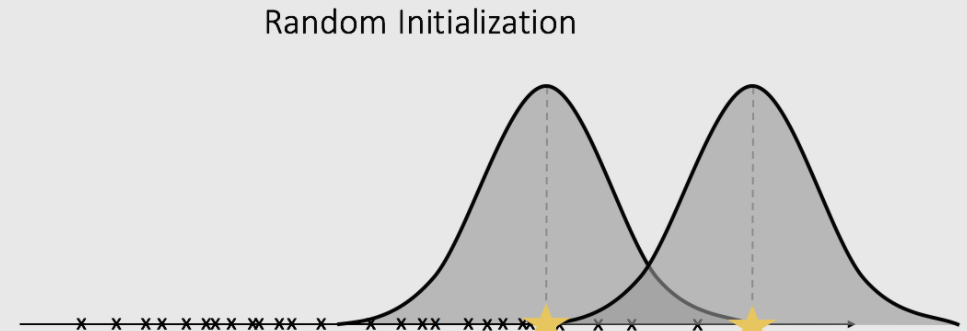

Po zainicjowaniu dwóch losowych Gaussa obliczymy prawdopodobieństwo, że każda obserwacja zostanie wyrażona w obu modelach Gaussa. Następnie przeliczymy modele Gaussa; użyjemy wszystkich obserwacji do obliczenia średniej i wariancji dla każdego Gaussa, ale obserwacje będą ważone prawdopodobieństwem zaistnienia w danym modelu.

Zamiast przypisywać obserwacje do klasy, zakładamy, że może ona należeć do dowolnego kklastry. Dlatego dla dowolnej obserwacji obliczymy prawdopodobieństwo, że należy ona do każdego zk-klastry. Dołączmy ukrytą zmienną do każdej obserwacji, która zawiera wektor,z, aby przechowywać te prawdopodobieństwa.

Po użyciu wektora z, aby obliczyć ważone parametry (średnią i wariancję) dla każdego klastra, aktualizujemy modele Gaussa. Skrajne lewe dane (zakreślone poniżej) pociągną oba modele w swoim kierunku, ale będą miały większy wpływ na lewy Gaussian, ponieważ obserwacje będą miały większą wagę dla modelu, do którego jest najbliżej.

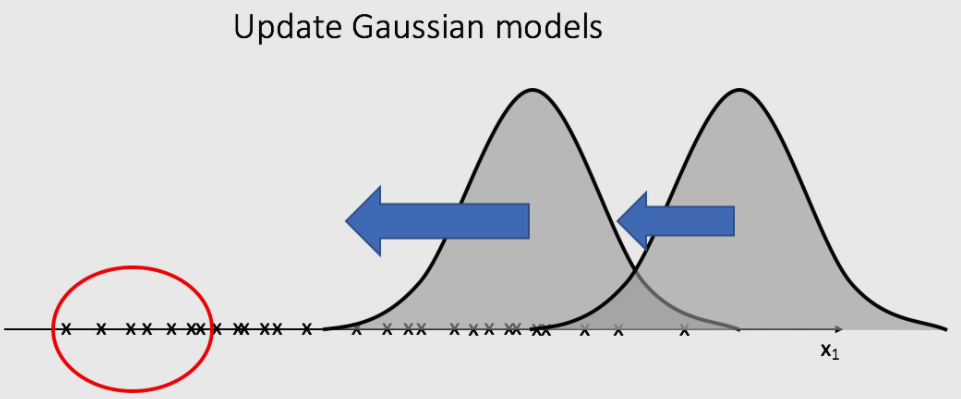

Będziemy kontynuować ten cykl przeliczania wektora z a następnie używając go do aktualizacji Gaussa, aż „zbiegniemy się” w optymalne klastry.

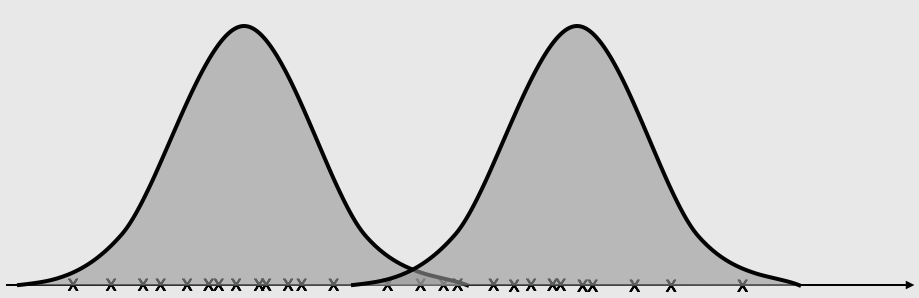

#### Inicjalizacja klastrów
Przede wszystkim musimy wybrać, na ile segmentów chcielibyśmy podzielić nasze dane. Aby to zrobić, możemy skorzystać z kryterium informacji Bayesa (BIC). To kryterium jest powszechnie używane do wyboru modelu z preferencją dla modelu o najniższym BIC. Dokumentacja sklearn zawiera dobry przykład tego procesu.

#### Definiowanie kryterium zatrzymania
W przypadku grupowania k-średnich iteracyjnie przeliczaliśmy średnie i ponownie przypisywaliśmy obserwacje, aż zbieżność i obserwacje przestaną poruszać się między skupieniami. Jednak ponieważ mamy teraz do czynienia z ciągłymi prawdopodobieństwami i ponieważ nigdy nie dajemy twardego przypisania klastra, nie możemy polegać na tej zbieżności. Zamiast tego ustawimy kryterium zatrzymania, które zakończy cykl iteracyjny, gdy prawdopodobieństwa obserwacji przestaną się zmieniać powyżej pewnego progu.

Różne opcje ograniczenia kowariancji szacowanych klas różnic: sferycznej, diagonalnej, wiązanej lub pełnej kowariancji
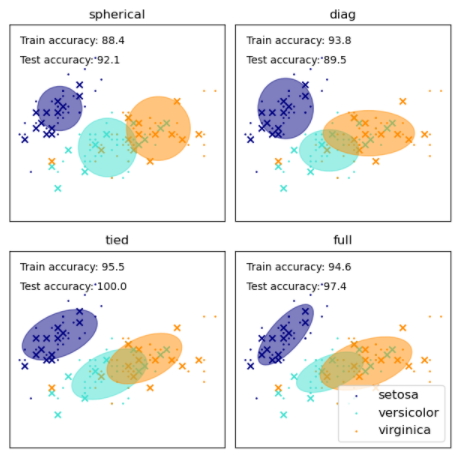

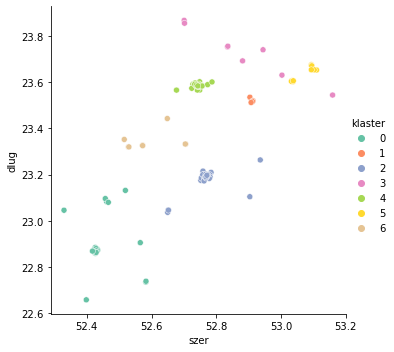

In [25]:
### SKLEARN

gm_ph = eda_ph[['szer','dlug']]

from sklearn.mixture import GaussianMixture

gm_cluster = GaussianMixture(n_components=7,            # liczba klastrów
                             covariance_type='full',    # typ kowariancji
                             tol=0.001,                 # kryterium stop dla zmiany kowariancji
                             reg_covar=1e-06,           # przekształcenie na zawsze dodatnia kowariancję
                             max_iter=100,              # kryterium stop - ilość iteracji
                             n_init=1,                  # ilość podejść do rozwiązania problemu
                             init_params='kmeans',      # metoda ustalenia centroidów na początku; kmeans, random 
                             random_state=None,         # ziarno dla losowych parametrów
                             warm_start=False)          # Jeżeli True, ostanie wyniki są początkiem dla kolejnej iteracji fit (n_init>1)

# KLASTERYZACJA
clusters = gm_cluster.fit_predict(gm_ph)
klastry = pd.DataFrame(clusters, columns=['klaster'])
gm_ph = pd.concat([gm_ph, klastry], axis=1)

# WIZUALIZACJA
sns.relplot(x="szer", y="dlug", data=gm_ph, kind="scatter", hue='klaster', palette="Set2" )

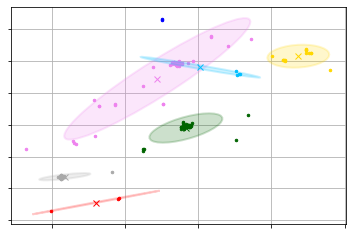

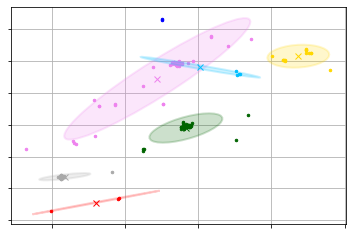

In [26]:
### PYCLUSTERING

from pyclustering.cluster.ema import ema, ema_visualizer, ema_observer

sample = eda_ph[['szer','dlug']]
ema_list = []
for ix, row in sample.iterrows():
    szer = row["szer"]
    dlug = row["dlug"]
    ema_list.append([szer,dlug])

    
# Create EM algorithm to allocated four clusters.
ema_instance = ema(ema_list, 
                   amount_clusters = 7,    # liczba klastrów
                   means = None,           # inicjalna liczna klastrów, gdy None, zostanie użyty k_means z metodą k_means++
                   variances = None,       # inicjalna wariancja klastrów, gdy None, zostanie użyty k_means z metodą k_means++
                   observer = None,        # obserwacja kroków uczenia, jeżeli tak to ema_observer
                   tolerance = 0.00001,    # kryterium STOP
                   iterations = 100 )      # ilośc iteracji

# Run clustering process.
ema_instance.process()

# Get clustering results.
clusters = ema_instance.get_clusters()
covariances = ema_instance.get_covariances()
means = ema_instance.get_centers()

# Visualize obtained clustering results.
ema_visualizer.show_clusters(clusters, ema_list, covariances, means)

### 10. FCM (Fuzzy C-Means) (pyclastering)

Źródło:

https://en.wikipedia.org/wiki/Fuzzy_clustering

https://sites.google.com/site/dataclusteringalgorithms/fuzzy-c-means-clustering-algorithm

https://www.datanovia.com/en/lessons/fuzzy-clustering-essentials/fuzzy-c-means-clustering-algorithm/

#### Algorytm klastrowania miękkiego C-średnich
Rozmyte klastrów (określany również jako miękkie klastrów lub miękkich k -means ) jest formą klastrów, w którym każdy punkt danych może należeć do więcej niż jednego klastra

Klastrowanie tradycyjne:
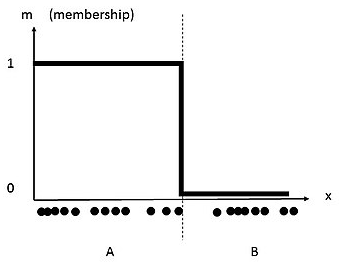
Ten zbiór danych można tradycyjnie podzielić na dwa klastry. Wybierając próg na osi X, dane są rozdzielane na dwa skupienia. Powstałe klastry są oznaczone jako „A” i „B”, jak widać na poniższym obrazku. Każdy punkt należący do zbioru danych miałby zatem współczynnik przynależności 1 lub 0. Ten współczynnik przynależności każdego odpowiedniego punktu danych jest reprezentowany przez włączenie osi y.

Klastrowanie miękkie:
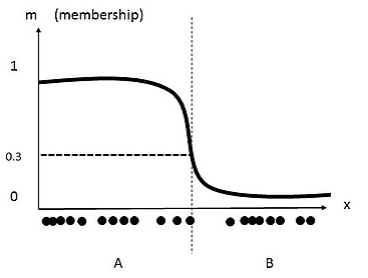
W klastrach rozmytych każdy punkt danych może mieć przynależność do wielu klastrów. Rozluźniając definicję współczynników przynależności od 1 do 0, wartości te mogą mieścić się w zakresie od dowolnej wartości od 1 do 0. Poniższy obraz przedstawia zestaw danych z poprzedniego grupowania, ale teraz zastosowano rozmyte grupowanie c-średnich. Po pierwsze, można wygenerować nową wartość progową definiującą dwa klastry. Następnie generowane są nowe współczynniki przynależności dla każdego punktu danych na podstawie centroid klastrów, a także odległości od każdego środka ciężkości klastra.

Algorytm rozmytego grupowania można podsumować w następujący sposób:

1. Określ liczbę skupień k (przez analityka)
2. Przypisz losowo każdemu punktowi współczynniki za bycie w klastrach.
3. Powtarzaj aż do osiągnięcia maksymalnej liczby iteracji (określonej przez „maxit”) lub gdy algorytm osiągnie zbieżność (tzn. Zmiana współczynników między dwiema iteracjami nie będzie większa niż ϵ, podany próg czułości):
4. Oblicz centroidę dla każdego klastra, korzystając z powyższego wzoru.
5. Dla każdego punktu oblicz jego współczynniki bycia w klastrach, korzystając z powyższego wzoru.

Zalety:
1. Daje najlepszy wynik dla nakładającego się zbioru danych i porównywalnie lepszy niż algorytm k-średnich.
2. W przeciwieństwie do k-średnich, gdzie punkt danych musi należeć wyłącznie do jednego centrum klastra, tutaj przypisywany jest punkt danych przynależność do każdego centrum klastra, w wyniku której punkt danych może należeć do więcej niż jednego centrum klastra.

Niedogodności:
1. Apriori określenie liczby klastrów.
2. Przy niższej wartości β uzyskujemy lepszy wynik, ale kosztem większej liczby iteracji.
3. Miary odległości euklidesowej mogą nierówno ważyć podstawowe czynniki.

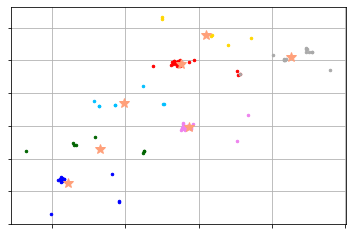

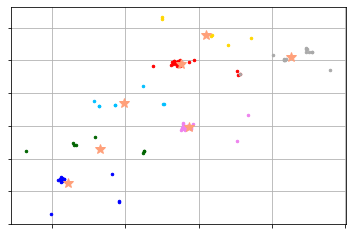

In [27]:
### PYCLASTERING

sample = eda_ph[['szer','dlug']]
fcm_list = []
for ix, row in sample.iterrows():
    szer = row["szer"]
    dlug = row["dlug"]
    fcm_list.append([szer,dlug])

# MODEL    
    
from pyclustering.cluster import cluster_visualizer
from pyclustering.cluster.center_initializer import kmeans_plusplus_initializer
from pyclustering.cluster.fcm import fcm
from pyclustering.utils import read_sample

# initialize
initial_centers = kmeans_plusplus_initializer(fcm_list,    # liczba definiowanych klastrów
                                              7,           # liczba klastrów
                                              kmeans_plusplus_initializer.FARTHEST_CENTER_CANDIDATE
                                             ).initialize()

# create instance of Fuzzy C-Means algorithm
fcm_instance = fcm(fcm_list, initial_centers)

# run cluster analysis and obtain results
fcm_instance.process()
clusters = fcm_instance.get_clusters()
centers = fcm_instance.get_centers()

# visualize clustering results
visualizer = cluster_visualizer()
visualizer.append_clusters(clusters, fcm_list)
visualizer.append_cluster(centers, marker='*', markersize=10)
visualizer.show()

### 11. Genetic clustering algorithm (GA) (pyclustering)

Źródło:
https://www.cs.cas.cz/~petra/slides/dexa.pdf


##### Algorytmy genetyczne 
Technika optymalizacji stochastycznej: 
 - ma zastosowanie w szerokim zakresie problemów
 - praca z populacją rozwiązań - jednostkami
 - nowe populacje produkowane przez operatorów genetycznych
Operatory genetyczne:
 - selekcja - im lepsze rozwiązanie, tym większe prawdopodobieństwo wybrane do reprodukcji
 - crossover - tworzy nowe osobniki łącząc stare
 - mutacja - losowe zmiany
 
KROKI:
1. Reprezentacja jednostki przy każdej iteracji:
 - podejście 1 - dla każdego punktu przypisujemy klaster (współrzędne)
 - podejście 2 - przechowywanie centrów klastrów i utrzymywać  przypisanie punktów do centrów
2. Dopasowywanie:
 - Normalizacja: podziel zestaw danych na klastry, przenieść środki do rzeczywistych środków ciężkości
3. Krzyzowanie:
 - wymiana całych bloków
 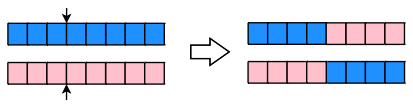

 - dopasowanie centra i łączenie ich
 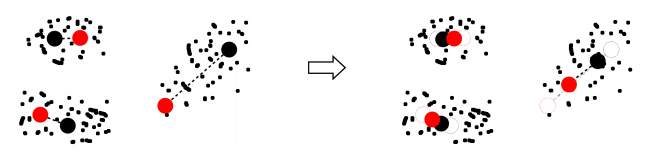
 
4. Mutacja - podejścia:
  - dodanie losowego punktu
  - przesunięcie losowego punktu do innego klastra
  - kilka iteracji za pomocą k-means
  - dodanie losowego klastra
  - usunięcie losowego klastra

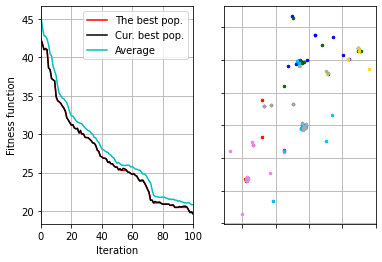

In [28]:
### PYCLASTERING

sample = eda_ph[['szer','dlug']]
ga_list = []
for ix, row in sample.iterrows():
    szer = row["szer"]
    dlug = row["dlug"]
    ga_list.append([szer,dlug])

# MODEL    
    
from pyclustering.cluster.ga import genetic_algorithm, ga_observer, ga_visualizer

# Create instance of observer that will collect all information:
observer_instance = ga_observer(True, True, True)

# Create genetic algorithm for clustering
ga_instance = genetic_algorithm(data=ga_list,             # dataset
                                count_clusters=7,         # liczba klastrów
                                chromosome_count=30,     # liczebność zbioru do mutacji
                                population_count=100,     # liczba iteracji
                                count_mutation_gens=2,    # liczba punktów w chromosomie do mutacji przy każdej iteracji
                                observer = observer_instance)
# Start processing
ga_instance.process()
# Obtain results
clusters = ga_instance.get_clusters()
# Print cluster to console
#print("Amount of clusters: '%d'. Clusters: '%s'" % (len(clusters), clusters))

# Show cluster using observer:
ga_visualizer.show_clusters(ga_list, observer_instance)

### 12. G-Means algorithm (pyclastering)

Źródło:
https://annoviko.github.io/G-Means/

Ideą algorytmu jest odkrycie odpowiedniej ilości klastrów za pomocą testu statystycznego w celu podjęcia decyzji, czy podzielić ośrodek K-średnich na dwa ośrodki. Brzmi jak algorytm X-średnich, w którym algorytm wykorzystuje Bayesowskie kryterium informacyjne (BIC) zamiast testu statystycznego. Jednak BIC jest nieskuteczna jako funkcja punktacji, ponieważ nie penalizuje wystarczająco złożoności modelu. Algorytm G-Means rozpoczyna wyszukiwanie od K (może być równa 1) liczbie klastrów. Podczas każdej iteracji algorytm dzieli każdy klaster (uzyskany w poprzedniej iteracji) na dwa ośrodki, jeśli ich dane wydają się nie pochodzić z rozkładu Gaussa. Do podjęcia decyzji o podziale stosuje się test statystyczny Andersona-Darlinga dla rozkładu Gaussa

G-Means jest w stanie wyodrębnić odpowiednie, dobrze rozproszone klastry z rozkładem Gaussa. Oczywiście algorytm dziedziczy wszystkie wady po K-średnich i K-średnich ++, ale jest w stanie znaleźć optymalne (prawie optymalne - quasi-optymalne) klastry z uwzględnieniem wspomnianych ograniczeń

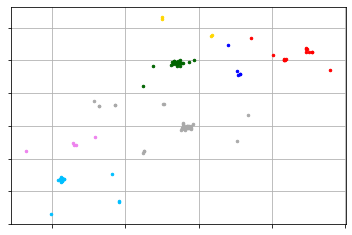

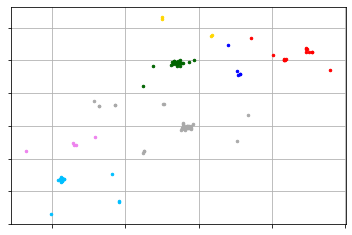

In [29]:
### PYCLASTERING

sample = eda_ph[['szer','dlug']]
gmeans_list = []
for ix, row in sample.iterrows():
    szer = row["szer"]
    dlug = row["dlug"]
    gmeans_list.append([szer,dlug])

# MODEL    

from pyclustering.cluster import cluster_visualizer
from pyclustering.cluster.gmeans import gmeans

# Create instance of G-Means algorithm. By default the algorithm starts search from a single cluster.
gmeans_instance = gmeans(gmeans_list, # dataset
                         repeat=5,     # ilość podziałów
                        k_max=7,     # maks ilość klastrów
                        k_init=1      # ilość początkowych klastrów
                        ).process()
# Extract clustering results: clusters and their centers
clusters = gmeans_instance.get_clusters()
centers = gmeans_instance.get_centers()
# Print total sum of metric errors
#print("Total WCE:", gmeans_instance.get_total_wce())
# Visualize clustering results
visualizer = cluster_visualizer()
visualizer.append_clusters(clusters, gmeans_list)
visualizer.show()

### 13. HDBSCAN  (hdbscan)

Źródło:

https://github.com/scikit-learn-contrib/hdbscan

https://hdbscan.readthedocs.io/en/latest/how_hdbscan_works.html

HDBSCAN - Hierarchiczne grupowanie przestrzenne oparte na gęstościach aplikacji z szumem. Wykonuje DBSCAN na różnych wartościach epsilon i integruje wynik w celu znalezienia grupowania, które zapewnia najlepszą stabilność w porównaniu z epsilon. Dzięki temu HDBSCAN może znaleźć klastry o różnej gęstości (w przeciwieństwie do DBSCAN) i jest bardziej odporny na wybór parametrów.

W praktyce oznacza to, że HDBSCAN od razu zwraca dobre klastrowanie z niewielkim dostrojeniem parametrów lub bez niego - a podstawowy parametr, minimalny rozmiar klastra, jest intuicyjny i łatwy do wyboru.

HDBSCAN jest idealny do eksploracyjnej analizy danych; jest to szybki i niezawodny algorytm, któremu można zaufać, zwracając znaczące klastry (jeśli takie istnieją).

Pakiet hdbscan jest wyposażony w narzędzia do wizualizacji, które pomagają zrozumieć wyniki grupowania. Po dopasowaniu danych obiekt klastra ma atrybuty dla skondensowanej hierarchi klastrów:
- Solidna hierarchia klastrów z pojedynczym połączeniem
- Minimalne drzewo rozpinające odległość osiągalności
- Wszystkie są wyposażone w metody kreślenia i konwertowania na Pandas lub NetworkX w celu dalszej analizy

#### Kroki działania algorytmu dla k sąsiadów (przykład: k=6)

1. Danego punktu możemy narysować okrąg dla odległości rdzenia jako okrąg, który dotyka szóstego najbliższego sąsiada (licząc sam punkt)
2. Wybierz inny punkt i możemy zrobić to samo, tym razem z innym zestawem sąsiadów (jeden z nich jest nawet pierwszym punktem, który wybraliśmy).
3. Możemy to zrobić trzeci raz na dokładkę, z kolejnym zestawem sześciu najbliższych sąsiadów i kolejnym okręgiem o nieco innym promieniu.
4. Chcemy poznać wzajemną odległość osiągalności między niebieskim i zielonym punktem, możemy zacząć od narysowania strzałki podającej odległość między zielonym a niebieskim.
5. To przechodzi przez niebieskie kółko, ale nie zielone kółko - odległość między rdzeniem zielonego jest większa niż odległość między niebieskim i zielonym. Musimy więc oznaczyć wzajemną odległość osiągalności między kolorem niebieskim i zielonym jako większą - równą promieniowi zielonego koła (najłatwiej to zobrazować, jeśli jeden koniec opieramy na zielonym punkcie).
6. Wzajemna odległość osiągalności od czerwonego do zielonego jest po prostu odległością od czerwieni do zieleni, ponieważ ta odległość jest większa niż odległość któregokolwiek z rdzeni (tj. Strzałka odległości przechodzi przez oba okręgi).

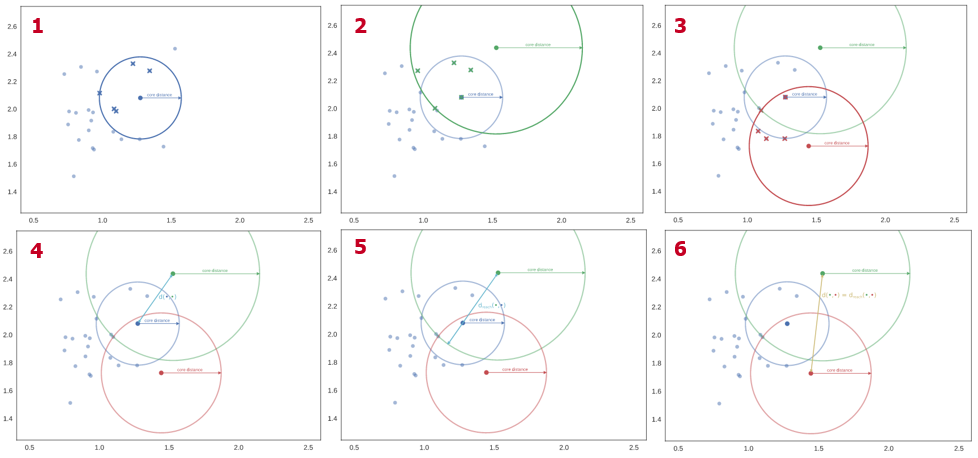

7. Teraz budujemy drzewo minimalne drzewo rozpinające za pomocą algorytmu Prima - budujemy drzewo po jednej krawędzi na raz, zawsze dodając krawędź o najniższej wadze, która łączy bieżące drzewo z wierzchołkiem, którego jeszcze nie ma w drzewie.
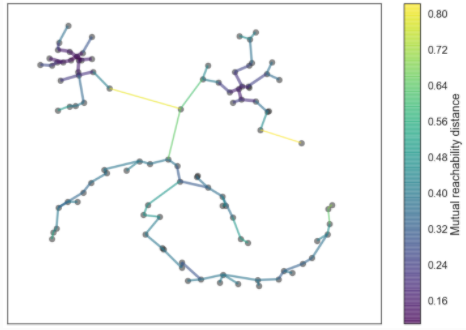

8. Budujemy hierarchię klastrów. Biorąc pod uwagę minimalne drzewo opinające, następnym krokiem jest przekształcenie go w hierarchię połączonych komponentów. Najłatwiej to zrobić w odwrotnej kolejności: posortuj krawędzie drzewa według odległości (w kolejności rosnącej), a następnie wykonaj iterację, tworząc nową scaloną grupę dla każdej krawędzi. Jedyną trudną częścią jest tutaj zidentyfikowanie dwóch klastrów, które każda krawędź będzie łączyć ze sobą
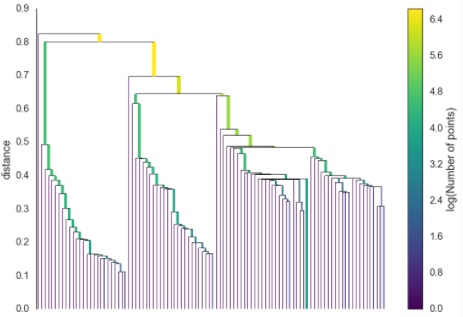

9. Skondensuj drzewo klastrów i wyodrębij klastry
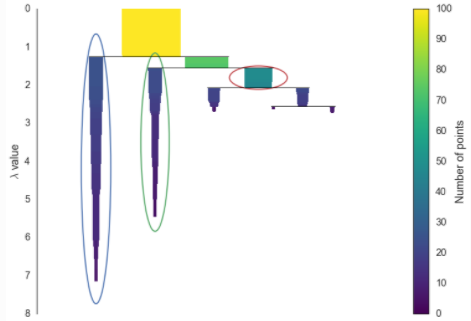

10. Teraz, gdy mamy klastry, łatwo jest przekształcić to w etykietowanie klastrów zgodnie z interfejsem API sklearn. Każdy punkt spoza wybranego klastra jest po prostu punktem szumu (i ma przypisaną etykietę -1). Możemy jednak zrobić trochę więcej: dla każdego klastra mamy  lambda_pdla każdego punktu p w tym klastrze; Jeśli po prostu znormalizujemy te wartości (tak, aby wahały się od zera do jednego), otrzymamy miarę siły przynależności do klastra dla każdego punktu w klastrze. 

<AxesSubplot:>

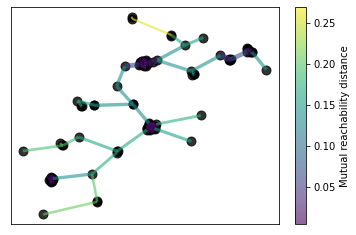

In [30]:
# HDBSCAN

hdbs_ph = eda_ph[['szer','dlug']]

import hdbscan

clusterer = hdbscan.HDBSCAN(algorithm='best',                 # opcje: 'best','generic','prims_kdtree','prims_balltree'
                            alpha=1.0,                        # Parametr skalowania
                            approx_min_span_tree=True,        # Czy zaakceptować tylko przybliżone minimalne drzewo opinające
                            gen_min_span_tree=True,           # Czy generować minimalne drzewo rozpinające
                            leaf_size=3,                      # Dla algorytmów drzewiastych
                            metric='euclidean',
                            cluster_selection_epsilon = 0.05, # Próg odległości. Klastry poniżej tej wartości zostaną scalone
                            min_cluster_size=7,               # minimalna wielkość klastra
                            min_samples=5,                    # liczba punktów w sąsiedztwie do wyznaczenia centroidu klastra
                            p=None)                           # Wartość p do użycia w przypadku metryki Minkowskiego

clusterer.fit(hdbs_ph)

# wykres drzewa opinającego
clusterer.minimum_spanning_tree_.plot(edge_cmap='viridis',
                                      edge_alpha=0.6,
                                      node_size=80,
                                      edge_linewidth=2)

<AxesSubplot:ylabel='distance'>

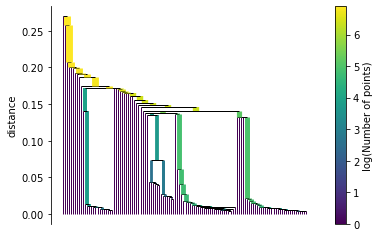

In [31]:
# hierarchia klastrów
clusterer.single_linkage_tree_.plot(cmap='viridis', colorbar=True)

<AxesSubplot:ylabel='$\\lambda$ value'>

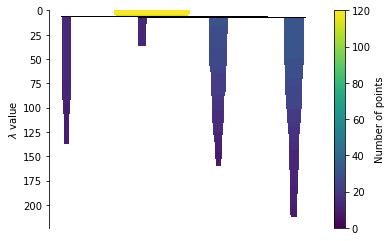

In [32]:
# skondensowane drzewo klastrów
clusterer.condensed_tree_.plot()

In [33]:
#Prawdopodobieństwo przynależności
hdbs_prob = pd.DataFrame(clusterer.probabilities_, columns=['prawdopod.'])

#Etykieta klastra
hdbs_labels = pd.DataFrame(clusterer.labels_, columns=['klaster'])

hdbs_ph2 = hdbs_ph.join(hdbs_labels)
hdbs_ph2 = hdbs_ph2.join(hdbs_prob)

hdbs_ph2

,szer,dlug,klaster,prawdopod.
0,52.747434,23.582321,3,1.000000
1,52.772853,23.191172,1,1.000000
2,52.783831,23.209798,1,0.262200
3,52.739984,23.576761,3,0.786778
4,52.774771,23.195821,1,0.933680
...,...,...,...,...
115,53.093511,23.653808,2,1.000000
116,52.398503,22.658295,-1,0.000000
117,52.417623,22.869191,0,0.665695
118,52.701787,23.855391,-1,0.000000


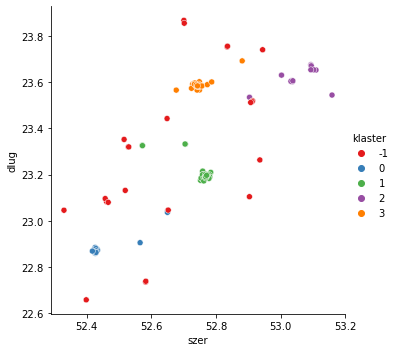

In [34]:
# WIZUALIZACJA
sns.relplot(x="szer", y="dlug", data=hdbs_ph2, kind="scatter", hue='klaster', palette="Set1" )

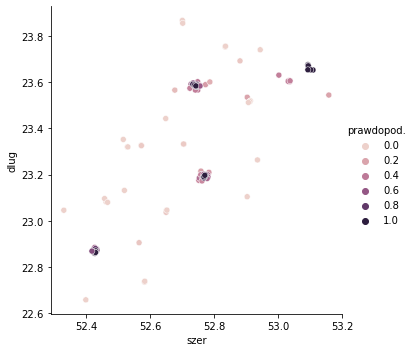

In [35]:
# PRAWDOPODOBIEŃSTWA
sns.relplot(x="szer", y="dlug", data=hdbs_ph2, kind="scatter", hue='prawdopod.')

### 14. Hierarchical Sync (HSyncNet)  (pyclustering)

Źródło:
https://arxiv.org/ftp/arxiv/papers/1411/1411.0189.pdf

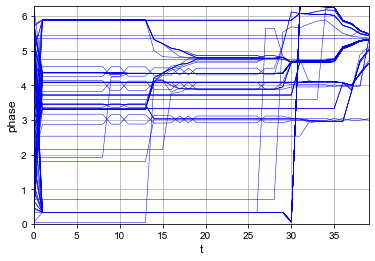

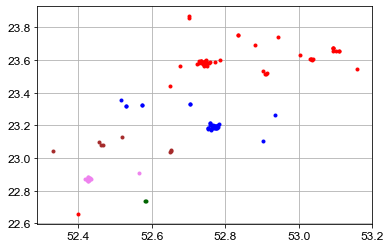

<AxesSubplot:>

In [36]:
### PYCLUSTERING

sample = eda_ph[['szer','dlug']]
hsync_list = []
for ix, row in sample.iterrows():
    szer = row["szer"]
    dlug = row["dlug"]
    hsync_list.append([szer,dlug])

from pyclustering.cluster.hsyncnet import hsyncnet
from pyclustering.nnet.sync import sync_visualizer
from pyclustering.utils import draw_clusters

# Create network for allocation of three clusters.
network = hsyncnet(hsync_list,            # dataset
                   number_clusters = 7,   # liczba klastrów do znalezienia
                   initial_neighbors = 7, # liczba sąsiadów do utworzenia klastra
                   increase_persent = 0.05 # stopień wzrostu odległości per iterację
                   )

# Run cluster analysis and output dynamic of the network.
analyser = network.process(0.995, collect_dynamic=True)

# Get allocated clusters.
clusters = analyser.allocate_clusters(eps=0.1)

# Show output dynamic of the network.
sync_visualizer.show_output_dynamic(analyser)

# Show allocated clusters.
draw_clusters(hsync_list, clusters)

### 15. K-Means  (sklearn, pyclustering)

Źródło:

https://scikit-learn.org/stable/modules/clustering.html#k-means

https://towardsdatascience.com/understanding-k-means-clustering-in-machine-learning-6a6e67336aa1

Algorytm KMeans grupuje dane, próbując rozdzielić próbki na n grup o równej wariancji, minimalizując kryterium znane jako bezwładność lub suma kwadratów wewnątrz klastra  Ten algorytm wymaga określenia liczby klastrów. Dobrze skaluje się do dużej liczby próbek i był używany w wielu obszarach zastosowań w wielu różnych dziedzinach.

Algorytm k-średnich dzieli zestaw próbek na rozłączne klastry, z których każda jest opisana przez średnią próbek w klastrze. Środki te są powszechnie nazywane „centroidami” klastra; generalnie nie są to punkty od, chociaż są w tej samej przestrzeni.

Algorytm K-średnich ma na celu wybór centroid, które minimalizują bezwładność lub kryterium sumy kwadratów wewnątrz klastra:

Bezwładność można uznać za miarę tego, jak wewnętrznie spójne są klastry. Ma różne wady:
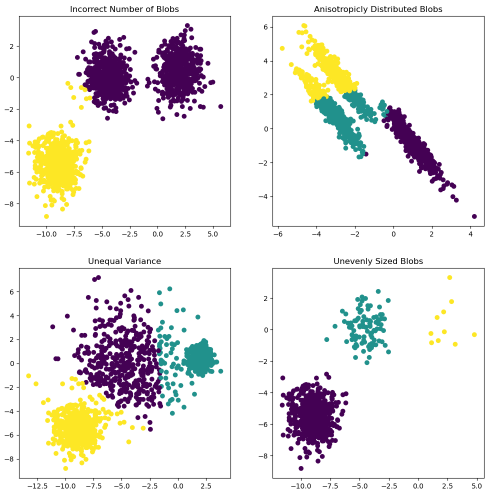

Bezwładność zakłada, że klastry są wypukłe i izotropowe, co nie zawsze ma miejsce. Słabo reaguje na wydłużone klastry lub rozmaitości o nieregularnych kształtach.

Bezwładność nie jest znormalizowaną miarą: po prostu wiemy, że niższe wartości są lepsze, a zero jest optymalne. Jednak w przestrzeniach o bardzo dużych wymiarach odległości euklidesowe mają tendencję do zawyżania (jest to przykład tak zwanego „przekleństwa wymiarowości”). Uruchomienie algorytmu redukcji wymiarowości, takiego jak analiza składowych głównych (PCA) przed grupowaniem k-średnich, może złagodzić ten problem i przyspieszyć obliczenia.

K-średnie jest często określane jako algorytm Lloyda. Zasadniczo algorytm składa się z trzech kroków. 
1. W pierwszym kroku wybiera się początkowe centroidy, przy czym najbardziej podstawową metodą jest wybranie próbek ze zbioru danych. 
2. Po inicjalizacji, K-średnie składa się z pętli między dwoma pozostałymi krokami. 
 - W pierwszym kroku każda próbka jest przypisywana do najbliższej centroidy. 
  - Drugi krok tworzy nowe centroidy, biorąc średnią wartość wszystkich próbek przypisanych do każdej poprzedniej centroidy. Obliczana jest różnica między starymi i nowymi centroidami, a algorytm powtarza te dwa ostatnie kroki, aż wartość ta będzie mniejsza niż próg. Innymi słowy, powtarza się, dopóki centroidy nie poruszają się znacząco.

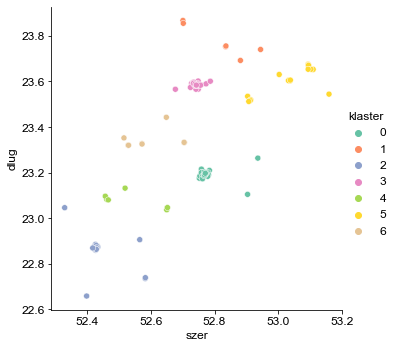

In [37]:
### SKLEARN

kmeans_ph = eda_ph[['szer','dlug']]

# MODEL

from sklearn.cluster import KMeans

kmeans_clf = KMeans(n_clusters=7,       # liczba klastrów
                init='k-means++',   # metoda iniclalizacji algorytmu
                n_init=10,          # ilość czasu, w którym algorytm k-średnich będzie uruchamiany z różnymi zarodkami środka ciężkości
                max_iter=300,       # maksymalna ilość iteracji
                tol=0.0001,         # wielkośc zmiany położenia centroidu do kryterium stop
                random_state=None,  # określa ziarno losowe do generowanie położenia centroidów do pierwszej iteracji
                copy_x=True,        # czy pracować na kopii danych
                )      

labels = kmeans_clf.fit_predict(kmeans_ph)
labels = pd.DataFrame(labels, columns=['klaster'])
kmeans_ph = pd.concat([kmeans_ph, labels], axis=1)

# WIZUALIZACJA
sns.relplot(x="szer", y="dlug", data=kmeans_ph, kind="scatter", hue='klaster', palette="Set2" )

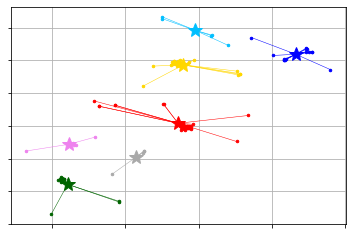

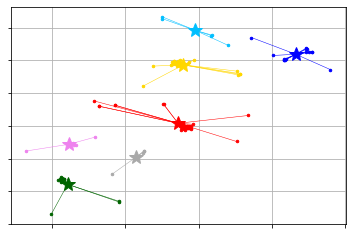

In [38]:
### PYCLASTERING

sample = eda_ph[['szer','dlug']]
kmeans_list = []
for ix, row in sample.iterrows():
    szer = row["szer"]
    dlug = row["dlug"]
    kmeans_list.append([szer,dlug])

from pyclustering.cluster.kmeans import kmeans, kmeans_visualizer
from pyclustering.cluster.center_initializer import kmeans_plusplus_initializer

# Prepare initial centers using K-Means++ method.
initial_centers = kmeans_plusplus_initializer(kmeans_list,       # dataset
                                            amount_centers = 7, # liczba klastrów
                                            tolerance = 0.001,   # zmiana powodująca zatrzymanie iteracji              
                                             ).initialize()

# Create instance of K-Means algorithm with prepared centers.
kmeans_instance = kmeans(kmeans_list, initial_centers)

# Run cluster analysis and obtain results.
kmeans_instance.process()
clusters = kmeans_instance.get_clusters()
final_centers = kmeans_instance.get_centers()

# Visualize obtained results
kmeans_visualizer.show_clusters(kmeans_list, clusters, final_centers)

### 16. K-means-constrained

Źródło:

https://joshlk.github.io/k-means-constrained/

Biblioteka zawierająca zmodyfikowaną wersję K-means zawierającą parametry dotyczące wielkości klastra

In [39]:
kmeans_c_ph = eda_ph[['szer','dlug']]

from k_means_constrained import KMeansConstrained

clf = KMeansConstrained(n_clusters=9,       # liczba klastrów
                        size_min=9,         # minimalna wielkość klastra
                        size_max=15,        # maksymalna wielkośc klastra
                        n_init=10,          # ilość czasu, w którym algorytm k-średnich będzie uruchamiany z różnymi zarodkami środka ciężkości
                        max_iter=300,       # maksymalna ilość iteracji
                        tol=0.0001,         # wielkośc zmiany położenia centroidu do kryterium stop
                        random_state=None,  # określa ziarno losowe do generowanie położenia centroidów do pierwszej iteracji
                        copy_x=True,        # czy pracować na kopii danych
                       )
 

labels = clf.fit_predict(kmeans_c_ph)
labels = pd.DataFrame(labels, columns=['klaster'])
kmeans_c_ph = pd.concat([kmeans_c_ph, labels], axis=1)

# WIZUALIZACJA
sns.relplot(x="szer", y="dlug", data=kmeans_c_ph, kind="scatter", hue='klaster', palette="Set2" )

ModuleNotFoundError: No module named 'ortools.graph.pywrapgraph'

### 17. K-Medians  (pyclastering)

Źródła:

https://www.coursera.org/lecture/cluster-analysis/3-5-the-k-medians-and-k-modes-clustering-methods-pShI2

https://stats.stackexchange.com/questions/109547/k-means-vs-k-median

https://en.wikipedia.org/wiki/K-medians_clustering

W statystykach i analizie danych , k -medians klastrów  jest analiza klasterowa algorytmu. Jest to odmiana k-średnich, oznacza skupianie się, gdzie zamiast obliczać średnią dla każdego skupienia w celu określenia jego środka ciężkości, zamiast tego oblicza się medianę. To ma wpływ na minimalizację błędu na wszystkich klastrów w odniesieniu do 1- normą odległość metryki, w przeciwieństwie do kwadratu 2-Norm odległość metryczny (co k -means robi).

Wiąże się to bezpośrednio z problemem median k w odniesieniu do normy 1, czyli problemu znalezienia k centrów tak, aby utworzone przez nie skupienia były jak najbardziej zwarte. Formalnie, biorąc pod uwagę zestaw danych punktów x , gdy k centra C i powinny być dobrane tak, aby zminimalizować sumę odległości od każdego x do najbliższego  c.

Sformułowana w ten sposób funkcja kryterialna jest czasem lepszym kryterium niż stosowana w algorytmie grupowania k- średnich , w którym wykorzystuje się sumę kwadratów odległości. Suma odległości jest szeroko stosowana w zastosowaniach, takich jak lokalizacja obiektu.

Algorytm jest bardziej odporny na obserwacje odstające

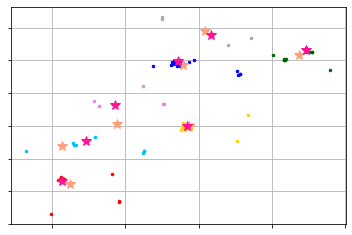

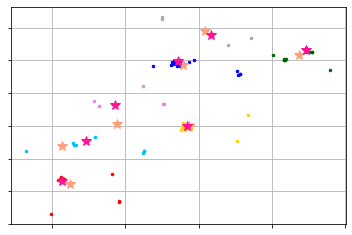

In [40]:
### PYCLASTERING

sample = eda_ph[['szer','dlug']]
kmedians_list = []
for ix, row in sample.iterrows():
    szer = row["szer"]
    dlug = row["dlug"]
    kmedians_list.append([szer,dlug])


from pyclustering.cluster.kmedians import kmedians
from pyclustering.cluster import cluster_visualizer
from pyclustering.utils.metric import distance_metric, type_metric

# Create instance of K-Medians algorithm.
initial_medians = [[52.45009992155044, 22.846058041994976],
 [52.758679205882345, 23.573239282352944],
 [53.073687542857144, 23.63084379285715],
 [52.77297746428138, 23.199712142430574],
 [52.57679955555555, 23.21174578888889],
 [52.42877322321053, 23.076348068984114],
 [52.816343632609005, 23.77743705113487]]

metric = distance_metric(type_metric.MANHATTAN)

kmedians_instance = kmedians(kmedians_list,              # dataset
                            initial_medians,             # początkowe współrzędne klastów
                            tolerance = 0.001,           # wielkośc zmiany położenia centroidu do kryterium stop
                            metric = metric,             # sposób liczenia odległości
                            itermax = 50)                # ilośc iteracji (kryterium stop)

# Run cluster analysis and obtain results.
kmedians_instance.process()
clusters = kmedians_instance.get_clusters()
medians = kmedians_instance.get_medians()

# Visualize clustering results.
visualizer = cluster_visualizer()
visualizer.append_clusters(clusters, kmedians_list)
visualizer.append_cluster(initial_medians, marker='*', markersize=10)
visualizer.append_cluster(medians, marker='*', markersize=10)
visualizer.show()

### 18. K-Medoids (pyclastering)

Źródła:

https://link.springer.com/referenceworkentry/10.1007%2F978-0-387-30164-8_426

https://www.datanovia.com/en/lessons/k-medoids-in-r-algorithm-and-practical-examples/

Grupowanie K- medoidów jest odmianą K- środków, która jest bardziej odporna na szumy i wartości odstające. Zamiast używać średniego punktu jako środka klastra, K- medoidy wykorzystuje rzeczywisty punkt w klastrze do reprezentowania go. Medoid jest najbardziej centralnie położonym obiektem klastra, z minimalną sumą odległości do innych punktów.

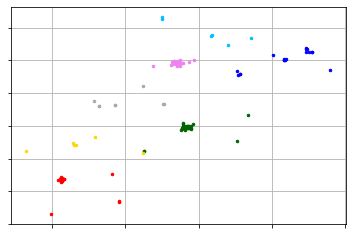

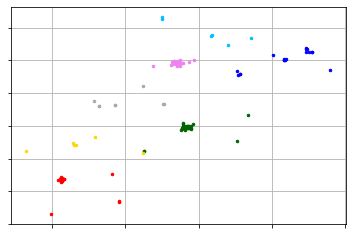

In [41]:
### PYCLUSTERING

sample = eda_ph[['szer','dlug']]
kmedoids_list = []
for ix, row in sample.iterrows():
    szer = row["szer"]
    dlug = row["dlug"]
    kmedoids_list.append([szer,dlug])

from pyclustering.cluster.kmedoids import kmedoids
from pyclustering.cluster import cluster_visualizer

# Set initial medoids.
initial_medoids = [1,5,10,15,20,25,30]

# Create instance of K-Medoids algorithm.
kmedoids_instance = kmedoids(kmedoids_list, initial_medoids)

# Run cluster analysis and obtain results.
kmedoids_instance.process()
clusters = kmedoids_instance.get_clusters()

# Display clusters.
visualizer = cluster_visualizer()
visualizer.append_clusters(clusters, kmedoids_list)
visualizer.show()

### K-..... algoritms - podsumowanie

k-średnia minimalizuje wariancję wewnątrz klastra, która jest równa kwadratowi odległości euklidesowych.

Na ogół robi to średnia arytmetyczna . Czyni nie zoptymalizować dystanse, ale kwadratów odchyleń od średniej.

k-medians minimalizuje bezwzględne odchylenia, które są równe odległości Manhattanu.

Ogólnie rzecz biorąc, mediana na oś powinna to robić. Jest to dobry estymator średniej, jeśli chcesz zminimalizować sumę odchyleń bezwzględnych (czyli sum_i abs (x_i-y_i)) zamiast kwadratów.

##### Oto twoje drzewo decyzyjne:

 - Jeśli odległość jest kwadratem odległości euklidesowej , użyj k-średnich
 - Jeśli odległość jest metryczną taksówką (odległość manhattan) , użyj k-median
 - Jeśli masz inny dystans , użyj k-medoids

### 19. MBSAS (Modified Basic Sequential Algorithmic Scheme)  (pyclustering)

Źródło:

http://cs.joensuu.fi/pages/oili/PR/?a=Some__Material&b=Sequential__Clustering

Algorytm MBSAS składa się z dwóch faz. Klastry są określane w pierwszej fazie poprzez przypisanie do nich niektórych wektorów X. Nieprzypisane wektory są przypisywane do odpowiednich klastrów w drugiej fazie.
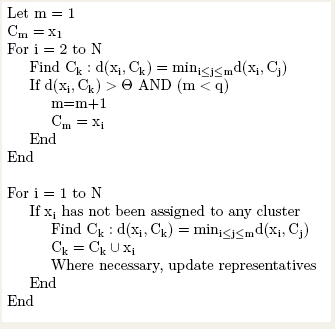

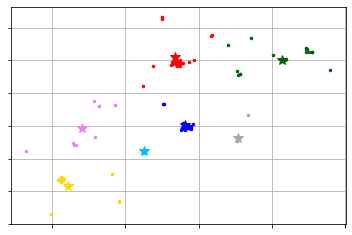

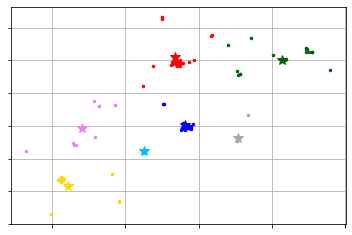

In [42]:
### PYCLASTERING

sample = eda_ph[['szer','dlug']]
mbsas_list = []
for ix, row in sample.iterrows():
    szer = row["szer"]
    dlug = row["dlug"]
    mbsas_list.append([szer,dlug])

from pyclustering.cluster.bsas import bsas_visualizer
from pyclustering.cluster.mbsas import mbsas

# Prepare algorithm's parameters.
max_clusters = 7   # maksymalna liczba klastrów   
threshold = 0.1     # maksymalna odległośc między punktami w klastrze

# Create instance of MBSAS algorithm.
mbsas_instance = mbsas(mbsas_list, max_clusters, threshold)
mbsas_instance.process()

# Get clustering results.
clusters = mbsas_instance.get_clusters()
representatives = mbsas_instance.get_representatives()

# Display results.
bsas_visualizer.show_clusters(mbsas_list, clusters, representatives)

### 20. MiniBatchKMeans (sklearn)

Źródło:
https://scikit-learn.org/stable/modules/clustering.html

MiniBatchKMeans jest wariantem KMeans, który wykorzystuje mini-partii w celu skrócenia czasu obliczeń, jednocześnie próbując zoptymalizować samą funkcję obiektywną. Mini-partie to podzbiory danych wejściowych, losowo próbkowane w każdej iteracji szkoleniowej. Te mini-partie drastycznie zmniejszają ilość obliczeń potrzebnych do uzyskania zbieżności z rozwiązaniem lokalnym. W przeciwieństwie do innych algorytmów, które skracają czas zbieżności k-średnich, mini-pakiet k-średnich daje wyniki, które są na ogół tylko nieznacznie gorsze niż standardowy algorytm.

Algorytm iteruje między dwoma głównymi krokami, podobnie jak k-średnie. W pierwszym kroku próbki są losowo pobierane ze zbioru danych w celu utworzenia mini-partii. Są one następnie przypisywane do najbliższej centroidy. W drugim kroku centroidy są aktualizowane. W przeciwieństwie do k-średnich odbywa się to na podstawie próbki. Dla każdej próbki w mini partii przypisana centroida jest aktualizowana poprzez pobranie średniej strumieniowej próbki i wszystkich poprzednich próbek przypisanych do tej centroidy. Ma to wpływ na zmniejszenie tempa zmian środka ciężkości w czasie. Kroki te są wykonywane aż do osiągnięcia zbieżności lub z góry określonej liczby iteracji.

MiniBatchKMeansz działa szybciej niż KMeans, ale jakość wyników jest obniżona. W praktyce ta różnica w jakości może być dość mała.
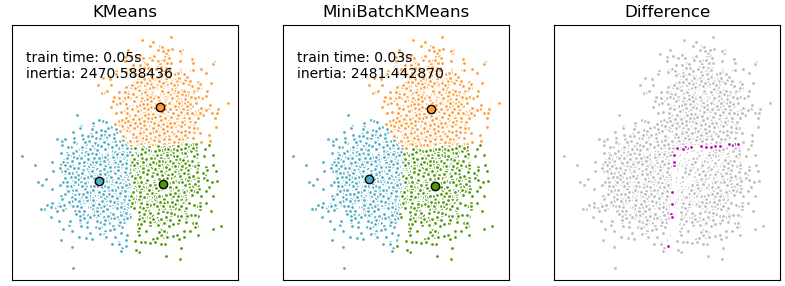

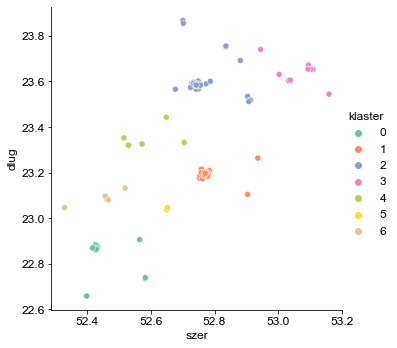

In [43]:
### SKLEARN

mkmeans_ph = eda_ph[['szer','dlug']]

from sklearn.cluster import MiniBatchKMeans

mkmeans = MiniBatchKMeans(n_clusters=7,              # liczba klastrów
                           max_iter=100,              # kryterium stop - liczba iteracji
                           batch_size=30,             # wielkość mini partii
                           tol=0.0001,                # kryterium stop - zmiana położnia centroidu
                           max_no_improvement=10,     # kryterium stop - ilość braku zmian dla mini partii
                           init_size=None,            # wielkość próby do zainicjowania pierwszych centroidów
                           n_init=7,               # ilość pierwszych centroidów
                           reassignment_ratio=0.01)   # ułamek, maksymalna liczba zliczeń centrum, które ma zostać ponownie przydzielone

labels = mkmeans.fit_predict(mkmeans_ph)
labels = pd.DataFrame(labels, columns=['klaster'])
mkmeans_ph = pd.concat([mkmeans_ph, labels], axis=1)

# WIZUALIZACJA
sns.relplot(x="szer", y="dlug", data=mkmeans_ph, kind="scatter", hue='klaster', palette="Set2" )

### 21. OPTICS (Ordering Points To Identify Clustering Structure) (sklearn, pyclustering)

Źródło:

https://towardsdatascience.com/clustering-using-optics-cac1d10ed7a7

https://scikit-learn.org/stable/modules/clustering.html#optics

OPTICS ma wiele podobieństw z DBSCAN i można uznać w przybliżeniu, że DBSCAN bada odległość (eps) od jednej wartości do zakresu wartości. Kluczowa różnica między DBSCAN a OPTICS polega na tym, że algorytm OPTICS tworzy wykres osiągalności , który przypisuje każdej próbce zarówno odległość, jak i miejsce w atrybucie klastra. Te dwa atrybuty są przypisywane po dopasowaniu modelu i służą do określania przynależności do klastra. Jeśli OPTICS jest uruchamiany z domyślną wartością inf ustawioną na max_eps, wówczas wyodrębnianie klastra w stylu DBSCAN może być wykonywane wielokrotnie w czasie liniowym dla dowolnej wartości eps. Oprawa max_eps do niższej wartości spowoduje skrócenie czasu działania i może być traktowana jako maksymalny promień sąsiedztwa z każdego punktu w celu znalezienia innych potencjalnych osiągalnych punktów.
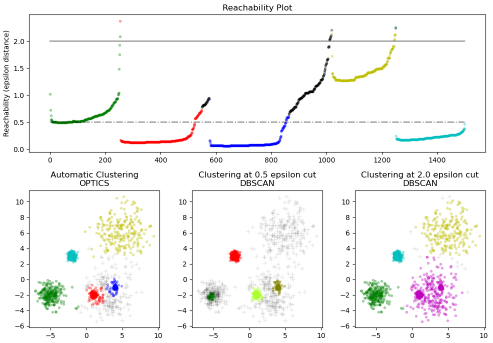
W osiągalności odległości generowane przez optyka pozwala na wydobycie gęstości zmiennej klastrów w ramach jednego zestawu danych. Jak pokazano na powyższym wykresie, połączenie odległości osiągalności i zestawu danych ordering_tworzy wykres osiągalności , na którym gęstość punktów jest reprezentowana na osi Y, a punkty są uporządkowane w taki sposób, że pobliskie punkty sąsiadują ze sobą. „Wycięcie” wykresu osiągalności przy jednej wartości daje wyniki podobne do DBSCAN; wszystkie punkty powyżej „cięcia” są klasyfikowane jako szum, a każda przerwa podczas czytania od lewej do prawej oznacza nową grupę. Domyślne wyodrębnianie klastrów za pomocą OPTICS sprawdza strome zbocza na wykresie, aby znaleźć klastry, a użytkownik może zdefiniować, co liczy się jako strome nachylenie za pomocą parametru xi

Aby zrozumieć, w jaki sposób tworzy ten wykres, musisz zrozumieć kilka definicji. Najpierw musisz zrozumieć, jak działa DBSCAN, używane przez niego parametry i różnicę między punktami podstawowymi i granicznymi.
Odległość rdzenia - minimalna wartość epsilon, aby z wyraźnego punktu uczynić punkt rdzeniowy, przy określonym skończonym parametrze MinPts.
Odległość osiągalności - odległość osiągalności obiektu p względem innego obiektu o jest najmniejszą odległością od o, jeśli o jest obiektem rdzeniowym. Nie może być również mniejsza niż odległość rdzenia o.

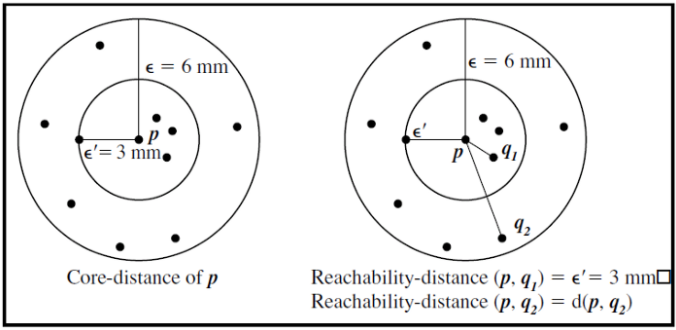

Metoda dobrze się sprawdza przy klastrach o różnej gęstości

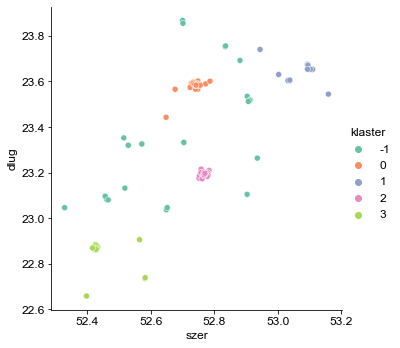

In [44]:
### SKLEARN

optics_ph = eda_ph[['szer','dlug']]

from sklearn.cluster import OPTICS

# MODEL

optics_clf = OPTICS(min_samples = 9,                # liczba punktów w sąsiedztwie aby uznać punkt za centralny
                    max_eps=0.6,                  # maksymalna odległość między dwiema próbkami, aby jedna była uważana za sąsiadującą z drugą.
                    metric='minkowski',           # typ liczonej odleglości ‘cityblock’, ‘cosine’, ‘euclidean’, ‘l1’, ‘l2’, ‘manhattan’
                    p=1,                          # parametr odległości minkowski
                    metric_params=None,           # dodatkowy parametr dla funkcji metrycznych np. euclidean
                    cluster_method='xi',          # sposób wyznaczania klastra - xi, dbscan
                    eps=None,                     # maksymalna odległość między dwoma próbkami, aby jedna była uważana za sąsiadującą z drugą
                    xi=0.14,                       # minimalną stromość na wykresie osiągalności, który stanowi granicę klastra [0-1]
                    predecessor_correction=True,  # korekta poprzedniego wyniku w kolejnych iteracjach fit
                    min_cluster_size=9,           # minimalna liczba próbek w klastrze OPTYKA, jeżeli jest metoda xi
                    algorithm='auto',             # algorytm do obliczania knn: 'auto', 'ball_tree', 'kd_tree', 'brute'
                    leaf_size=10,                 # wielkość liścia dla algorytmów drzewiastych
                    n_jobs=-1)

labels = optics_clf.fit_predict(optics_ph)
labels = pd.DataFrame(labels, columns=['klaster'])
optics_ph = pd.concat([optics_ph, labels], axis=1)

# WIZUALIZACJA
sns.relplot(x="szer", y="dlug", data=optics_ph, kind="scatter", hue='klaster', palette="Set2" )

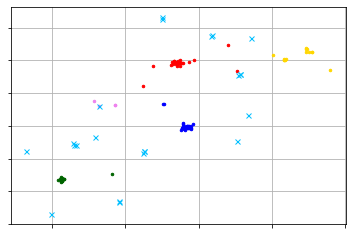

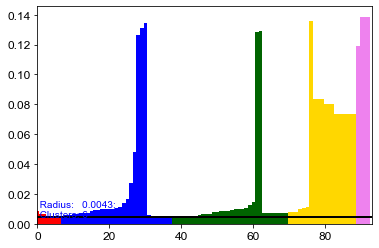

In [45]:
### PYCLASTERING

sample = eda_ph[['szer','dlug']]
optics_list = []
for ix, row in sample.iterrows():
    szer = row["szer"]
    dlug = row["dlug"]
    optics_list.append([szer,dlug])

from pyclustering.cluster import cluster_visualizer
from pyclustering.cluster.optics import optics, ordering_analyser, ordering_visualizer

# Run cluster analysis where connectivity radius is bigger than real.

optics_instance = optics(optics_list,               # dataset
                         eps = 0.14,                 # odległość między punktami w klastrze
                         minpts = 7,                # minimalna liczba współdzielonych sąsiadów wymagana do ustanowienia połączeń między punktami
                         radius = 0.005,            # odległość osiągalności ?
                         neighbors = 5,             # liczba sąsiadów do zaliczenia ps jako centroid
                         amount_of_clusters = 7)    # liczba przydzielanych klastrów

# Performs cluster analysis.
optics_instance.process()

# Obtain results of clustering.
clusters = optics_instance.get_clusters()
noise = optics_instance.get_noise()

# Visualize clustering results (clusters and outliers).
visualizer = cluster_visualizer()
visualizer.append_clusters(clusters, optics_list)
visualizer.append_cluster(noise, optics_list, marker='x')
visualizer.show()

# Display ordering.
ordering = optics_instance.get_ordering()
analyser = ordering_analyser(ordering)
ordering_visualizer.show_ordering_diagram(analyser, 6)

### 22. ROCK (pyclastering)

Źródło:
https://en.wikibooks.org/wiki/Data_Mining_Algorithms_In_R/Clustering/RockCluster

Algorytm klastrowania ROCK (RObust Clustering using linKs),  należy do klasy aglomeracyjnych hierarchicznych algorytmów klastrowania. Kroki związane z klastrowaniem za pomocą ROCK są opisane na poniższym rysunku. 
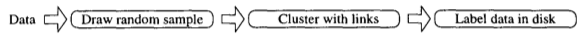
Po pobraniu losowej próbki z bazy danych do próbkowanych punktów stosowany jest hierarchiczny algorytm grupowania wykorzystujący łącza. Na koniec klastry obejmujące tylko próbkowane punkty są używane do przypisywania pozostałych punktów danych na dysku do odpowiednich klastrów. W następnych podrozdziałach najpierw bardziej szczegółowo opiszemy kroki wykonywane przez firmę ROCK

 - Krok Algorytm grupowania: Przyjmuje jako dane wejściowe zbiór S z N próbkowanych punktów, które mają być zgrupowane (które są losowane losowo z oryginalnego zestawu danych) oraz liczbę żądanych klastrów k. Procedura rozpoczyna się od obliczenia liczby połączeń między parami punktów. Początkowo każdy punkt jest oddzielnym klastrem. Dla każdego klastra i tworzymy lokalną stertę q i utrzymujemy ją podczas wykonywania algorytmu. Sterta zawiera każdy klaster j taki, że łącze jest niezerowe. Skupiska jw stercie q są uporządkowane w malejącej kolejności.
 - Krok Obliczanie linków: Dla każdego punktu, po obliczeniu listy sąsiadów, algorytm bierze pod uwagę wszystkie pary sąsiadów. Dla każdej pary punkt dostarcza jedno łącze. Jeśli proces zostanie powtórzony dla każdego punktu, a liczba linków zostanie zwiększona dla każdej pary sąsiadów, to na końcu połączenie zlicza się dla wszystkich par punktów.


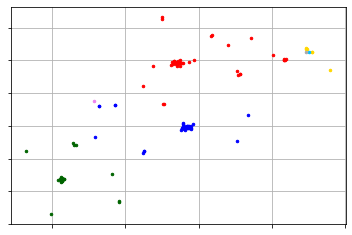

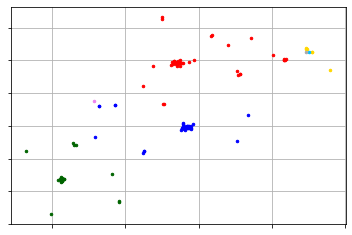

In [46]:
### PYCLUSTERING

sample = eda_ph[['szer','dlug']]
rock_list = []
for ix, row in sample.iterrows():
    szer = row["szer"]
    dlug = row["dlug"]
    rock_list.append([szer,dlug])

from pyclustering.cluster import cluster_visualizer
from pyclustering.cluster.rock import rock


# Create instance of ROCK algorithm for cluster analysis. Seven clusters should be allocated.
rock_instance = rock(rock_list,           # dataset
                     eps = 0.3,           # próg podobieństwa, punkty są sąsiadami, jeśli odległość między nimi jest mniejsza niż promień łączności
                     number_clusters = 7, #liczba klastrów do znalezienia
                     threshold = 0.4)     # Wartość określająca stopień normalizacji wpływający na wybór klastrów do scalania
# Run cluster analysis.
rock_instance.process()
# Obtain results of clustering.
clusters = rock_instance.get_clusters()
# Visualize clustering results.
visualizer = cluster_visualizer()
visualizer.append_clusters(clusters, rock_list)
visualizer.show()

### 23. SOM-SC (Self-Organized Feature Map for Simple Clustering)  (pyclustering)

Źródło:
https://en.wikipedia.org/wiki/Self-organizing_map

https://www.comp.nus.edu.sg/~rudys/arnie/som-vs-fuzzy.pdf

https://www.biorxiv.org/content/10.1101/124693v2.full.pdf

Algorytm ten wykorzystuje liczbę klastrów, które powinny być przydzielone jako rozmiar mapy SOM. Obiekty wychwycone przez neurony są skupiskami, innymi słowy, każdy neuron koduje tylko jedną grupę. Algorytm jest w stanie przetwarzać dane z rozkładem Gaussa, które mają formy sferyczne

Samoorganizujące map ( SOM ) lub samoorganizujące cechą map ( SOFM ) to rodzaj sztucznej sieci neuronowej (SSN), który jest szkolony z użyciem Uczenia Nienadzorowango i produkuje nisko-wymiarową (zazwyczaj dwuwymiarową), reprezentację przestrzeni wejściowej próbek uczących, zwana mapą, i dlatego jest metodą redukcji wymiarowości. Mapy samoorganizujące się różnią się od innych sztucznych sieci neuronowych, ponieważ stosują uczenie konkurencyjne, a nie uczenie z korekcją błędów (takie jak propagacja wsteczna z gradientem) i w tym sensie, że używają funkcji sąsiedztwa, aby zachować topologiczne właściwości przestrzeni wejściowej.

Formuła powstała w Synapse sprawia, że SOM są przydatne do wizualizacji poprzez tworzenie niskowymiarowych widoków danych wielowymiarowych, podobnie jak w przypadku skalowania wielowymiarowego. Sztuczna sieć neuronowa wprowadzona przez fińskiego profesora Teuvo Kohonena w latach 80. jest czasami nazywana mapą lub siecią Kohonena.

#### Struktura i operacje
Podobnie jak większość sztucznych sieci neuronowych, SOM działają w dwóch trybach: uczącym i mapującym. „Trening” buduje mapę na podstawie przykładów wejściowych ( proces konkurencyjny , zwany także kwantyzacją wektorową ), podczas gdy „mapowanie” automatycznie klasyfikuje nowy wektor wejściowy.

Widoczną częścią samoorganizującej się mapy jest przestrzeń mapy, która składa się z komponentów zwanych węzłami lub neuronami. Przestrzeń mapy jest definiowana wcześniej, zwykle jako skończony dwuwymiarowy region, w którym węzły są rozmieszczone w regularnej sześciokątnej lub prostokątnej siatce. Każdy węzeł jest powiązany z wektorem „wagi”, który jest pozycją w przestrzeni wejściowej; to znaczy ma taki sam wymiar jak każdy wektor wejściowy. Podczas gdy węzły w obszarze mapy pozostają nieruchome, uczenie polega na przesuwaniu wektorów wagi w kierunku danych wejściowych (zmniejszanie metryki odległości) bez niszczenia topologii wywołanej z obszaru mapy. W ten sposób samoorganizująca się mapa opisuje odwzorowanie z wyżej-wymiarowej przestrzeni wejściowej do niższej-wymiarowej przestrzeni mapy. Po przeszkoleniu mapa może sklasyfikować wektor z przestrzeni wejściowej, znajdując węzeł z wektorem wagi najbliższym (metryki najmniejszej odległości) wektorem przestrzeni wejściowej.
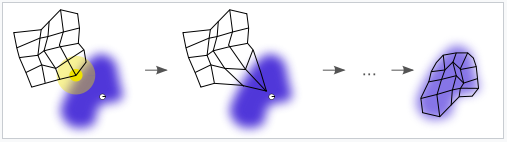


#### Algorytm 
1. Losuj wektory wagi węzłów na mapie
2. Wybierz losowo wektor wejściowy 
3. Przejdź przez każdy węzeł na mapie
    - Użyj wzoru na odległość euklidesową, aby znaleźć podobieństwo między wektorem wejściowym a wektorem wagi węzła mapy
    - Śledź węzeł, który generuje najmniejszą odległość (ten węzeł jest najlepiej dopasowaną jednostką, BMU)
4. Zaktualizuj wektory wagi węzłów w sąsiedztwie BMU (w tym samego BMU), przyciągając je bliżej wektora wejściowego
5. Kolejna iteracja

Algorytm wariantowy:

1. Losuj wektory wagi węzłów mapy
2. Przejedź przez każdy wektor wejściowy w zestawie danych wejściowych
     - Przejdź przez każdy węzeł na mapie
        - Użyj wzoru na odległość euklidesową, aby znaleźć podobieństwo między wektorem wejściowym a wektorem wagi węzła mapy
        - Śledź węzeł, który generuje najmniejszą odległość (ten węzeł jest najlepiej dopasowaną jednostką, BMU)
    - Zaktualizuj węzły w sąsiedztwie BMU (w tym sam BMU), przyciągając je bliżej wektora wejściowego
3. Kolejna iteracja

#### Interpretacja
Istnieją dwa sposoby interpretacji SOM. Ponieważ w fazie treningowej ciężary całej okolicy są przesuwane w tym samym kierunku, podobne przedmioty mają tendencję do wzbudzania sąsiednich neuronów. Dlatego SOM tworzy mapę semantyczną, na której podobne próbki są mapowane blisko siebie, a różne od siebie. Można to zwizualizować za pomocą macierzy U (odległość euklidesowa między wektorami masy sąsiednich komórek) SOM. 

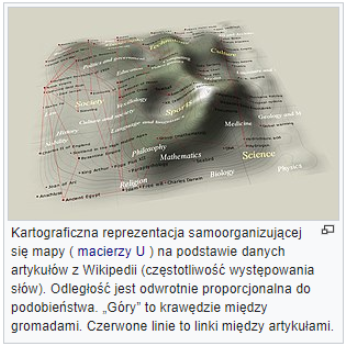

Innym sposobem jest myślenie o wagach neuronów jako wskaźnikach do przestrzeni wejściowej. Tworzą dyskretne przybliżenie rozkładu próbek uczących. Więcej neuronów wskazuje na regiony o wysokiej koncentracji próbek treningowych, a mniej w miejscach, w których próbek jest niewiele.

SOM można uznać za nieliniowe uogólnienie analizy głównych składników (PCA). Wykazano, wykorzystując zarówno sztuczne, jak i rzeczywiste dane geofizyczne, że SOM ma wiele zalet w porównaniu z konwencjonalnymi metodami ekstrakcji cech, takimi jak Empirical Orthogonal Functions (EOF) lub PCA.

Pierwotnie SOM nie był sformułowany jako rozwiązanie problemu optymalizacji. Niemniej jednak podjęto kilka prób modyfikacji definicji SOM i sformułowania problemu optymalizacji, który daje podobne wyniki. Na przykład:
- mapy sprężystości 
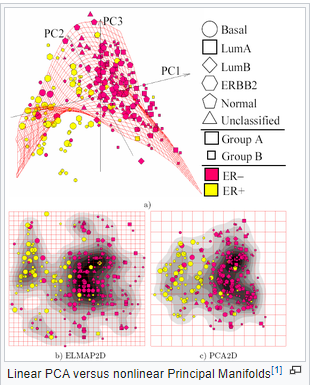

- nieliniowa redukcja wymiarów
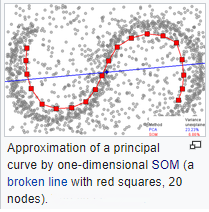

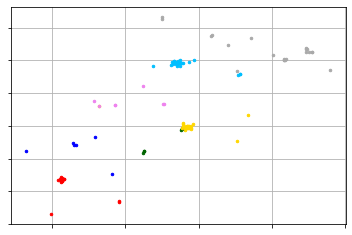

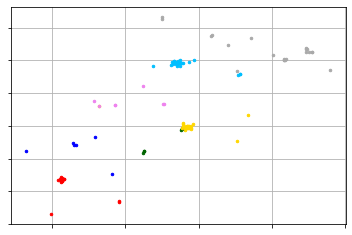

In [47]:
### PYCLUSTERING

sample = eda_ph[['szer','dlug']]
som_list = []
for ix, row in sample.iterrows():
    szer = row["szer"]
    dlug = row["dlug"]
    som_list.append([szer,dlug])

# MODEL    
    
from pyclustering.cluster import cluster_visualizer
from pyclustering.cluster.somsc import somsc

# Create instance of SOM-SC algorithm to allocated two clusters
somsc_instance = somsc(som_list,            # dataset
                       amount_clusters = 7, # liczba klastrów
                       epouch = 100)        # liczba warstw

# Run cluster analysis and obtain results
somsc_instance.process()
clusters = somsc_instance.get_clusters()

# Visualize clustering results.
visualizer = cluster_visualizer()
visualizer.append_clusters(clusters, som_list)
visualizer.show()

### 24. Spectral clustering (sklearn)

Źródło:

https://scikit-learn.org/stable/modules/clustering.html#spectral-clustering

https://towardsdatascience.com/spectral-clustering-for-beginners-d08b7d25b4d8


SpectralClustering wykonuje nisko-wymiarowe osadzanie macierzy połączeń między próbkami, a następnie grupowanie, np. przez KMeans, składników wektorów własnych w przestrzeni niskowymiarowej.

Klastrowanie spektralne jest oparte na grafach. Można go skutecznie rozwiązać za pomocą standardowego oprogramowania do algebry liniowej i bardzo często przewyższa tradycyjne algorytmy, takie jak algorytm k-średnich.
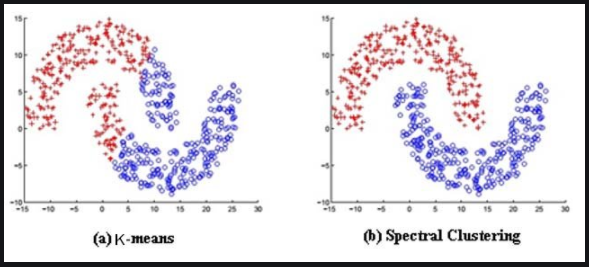
Aby wykonać grupowanie widmowe, potrzebujemy 3 głównych kroków:
1. Utwórz wykres podobieństwa między naszymi N obiektami do skupienia, np. metodą KNN
2. Oblicz pierwsze k wektorów własnych jego macierzy Laplace`a, aby zdefiniować wektor cech dla każdego obiektu.
3. Uruchom k-średnich na tych funkcjach, aby podzielić obiekty na k klas.

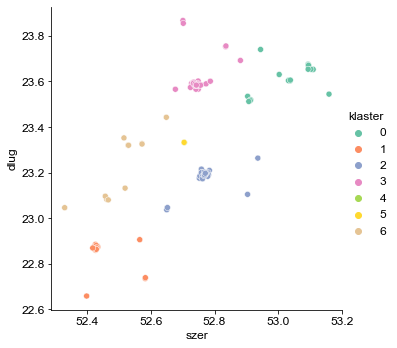

In [48]:
### SKLEARN

sc_ph = eda_ph[['szer','dlug']]

from sklearn.cluster import SpectralClustering

# MODEL

sc_clf = SpectralClustering(n_clusters=7,       # liczba klastrów
                            eigen_solver=None,  # Strategia dekompozycji wartości własnych: None, 'arpack', 'lobpcg', or 'amg'
                            n_components=None,  # liczba wektorów własnych domyślnie równa n_clusters
                            random_state=None,  # ziarno losowe do inicjacji centrów
                            n_init=10,          # ilość uruchomień k-means
                            gamma=1.0,          # Współczynnik jądra dla jąder rbf, poli, esicy, laplacian i chi2
                            affinity='rbf',     # metoda budowania macieży połączeń: ‘nearest_neighbors’, ‘rbf’, '‘precomputed’',‘precomputed_nearest_neighbors’
                            n_neighbors=10,     # KNN - Liczba sąsiadów do wykorzystania podczas konstruowania macierzy powinowactwa
                            eigen_tol=0.0,      # Kryterium zatrzymujące dla rozkładu własnego macierzy
                            assign_labels='kmeans', # narzędzie do przypisywania klastrów:  'kmeans', 'discretize'
                            n_jobs=-1)

labels = sc_clf.fit_predict(sc_ph)
labels = pd.DataFrame(labels, columns=['klaster'])
sc_ph = pd.concat([sc_ph, labels], axis=1)

# WIZUALIZACJA
sns.relplot(x="szer", y="dlug", data=sc_ph, kind="scatter", hue='klaster', palette="Set2" )

### 25. Sync (pyclastering)

Źródła:
https://en.wikipedia.org/wiki/SynqNet

https://en.wikipedia.org/wiki/Kuramoto_model


SyncNet to algorytm inspirowany biologią, oparty na sieci oscylacyjnej wykorzystującej zmodyfikowany model Kuramoto. Każdy atrybut obiektu danych jest traktowany jako oscylator fazy.

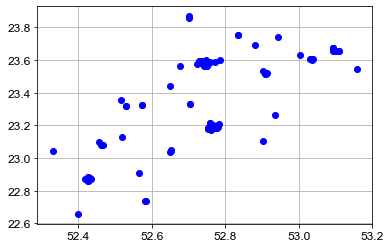

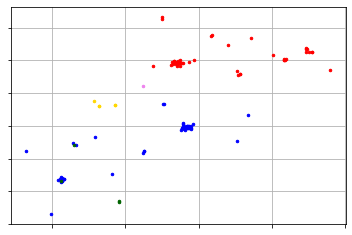

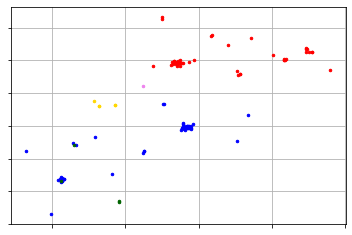

In [49]:
### PYCLUSTERING

sample = eda_ph[['szer','dlug']]
sync_list = []
for ix, row in sample.iterrows():
    szer = row["szer"]
    dlug = row["dlug"]
    sync_list.append([szer,dlug])

# MODEL   

from pyclustering.cluster import cluster_visualizer
from pyclustering.cluster.syncnet import syncnet, solve_type, conn_represent, initial_type


# Create oscillatory network
network = syncnet(sync_list,          # datatset
                 radius = 0.22,       # maksymalna odległość między punktami aby były uznane za połączone
                 conn_repr = conn_represent.MATRIX,  # sposób połączenia w sieci
                 initial_phases = initial_type.RANDOM_GAUSSIAN,  # sposób inicjacji procesu
                 enable_conn_weight = False)    #True - włącz tryb, gdy siła między oscylatorami zależy od odległości między dwoma oscylatorami

# Run cluster analysis and collect output dynamic of the oscillatory network.
# Network simulation is performed by Runge Kutta 4.
analyser = network.process(0.998,                   # Kolejność synchronizacji używana jako wskazanie zatrzymania przetwarzania
                           solve_type.RK4,          # Określony typ rozwiązywania różnic
                           collect_dynamic = True  # Określony wymóg gromadzenia całej dynamiki sieci  
                        )
# Show oscillatory network.
network.show_network()

# Obtain clustering results.
clusters = analyser.allocate_clusters()

# Visualize clustering results.
visualizer = cluster_visualizer()
visualizer.append_clusters(clusters, sync_list)
visualizer.show()

### 26. SYNC-SOM (pyclustering)

SYNC-SOM to algorytm inspirowany biologią, oparty na sieci oscylacyjnej, która wykorzystuje samodzielnie zorganizowaną mapę cech jako pierwszą warstwę. Połączenie sieci SOM i SYNC

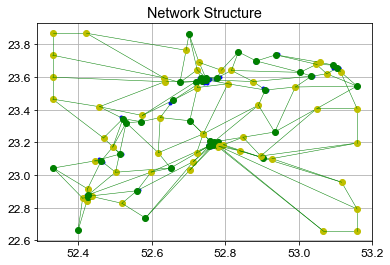

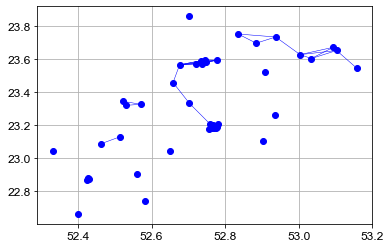

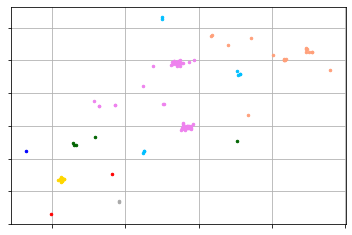

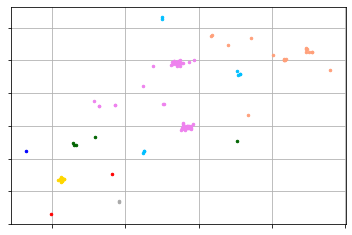

In [50]:
### PYCLUSTERING

sample = eda_ph[['szer','dlug']]
syncsom_list = []
for ix, row in sample.iterrows():
    szer = row["szer"]
    dlug = row["dlug"]
    syncsom_list.append([szer,dlug])

# MODEL 
from pyclustering.cluster import cluster_visualizer
from pyclustering.cluster.syncsom import syncsom

# create oscillatory network for cluster analysis where the first layer has 
network = syncsom(syncsom_list,   # dataset
                  10,             # Rzędy neuronów (liczba neuronów w kolumnie) w warstwie wejściowej (samoorganizująca się mapa cech)
                  10,             # Kolumny neuronów (liczba neuronów w rzędzie) na wejściu później (samoorganizująca się mapa cech)
                  0.13)           # Promień łączności między obiektami, który definiuje połączenie między oscylatorami w drugiej warstwie

# simulate network (perform cluster analysis) and collect output dynamic
(dyn_time, dyn_phase) = network.process(True, 0.998)

# obtain encoded clusters
encoded_clusters = network.get_som_clusters()

# obtain real clusters
clusters = network.get_clusters()

# show the first layer of the network - warstwa SOM
network.show_som_layer()

# show the second layer of the network - warstwa SYNC
network.show_sync_layer()

# Visualize clustering results.
visualizer = cluster_visualizer()
visualizer.append_clusters(clusters, syncsom_list)
visualizer.show()

### 27. TTSAS (Two-Threshold Sequential Algorithmic Scheme)  (pyclustering)

Źródło:

https://pyclustering.github.io/docs/0.10.0/html/df/db9/classpyclustering_1_1cluster_1_1ttsas_1_1ttsas.html#details

TTSAS jest odmianą algorytmów BSAS i MBSAS. Wyniki grupowania BSAS i MBSAS są silnie zależne od kolejności, w jakiej znajdują się punkty w danych. TTSAS pomaga przezwyciężyć tę wadę, stosując dwa parametry progowe. Pierwszy - jeśli odległość do najbliższego klastra jest mniejsza niż pierwszy próg, do klastra przypisywany jest punkt. Drugi - jeśli odległość do najbliższego klastra jest większa niż drugi próg, przydzielany jest nowy klaster

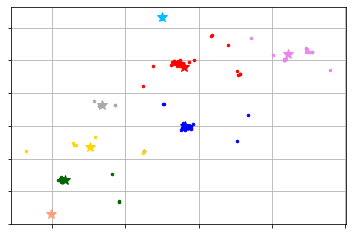

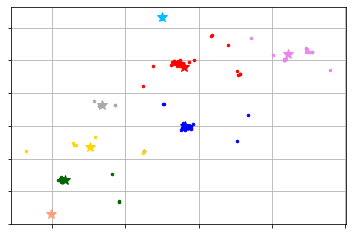

In [51]:
### PYCLUSTERING

sample = eda_ph[['szer','dlug']]
ttsas_list = []
for ix, row in sample.iterrows():
    szer = row["szer"]
    dlug = row["dlug"]
    ttsas_list.append([szer,dlug])

# MODEL    
    
from pyclustering.cluster.bsas import bsas_visualizer
from pyclustering.cluster.ttsas import ttsas

# Prepare algorithm's parameters.
threshold1 = 0.2   # Graniczna odległość między punktem a jego najbliższym klastrem, jeżeli mniejsza przypisywany do klastra
threshold2 = 0.3   # Graniczna odległość między punktem a jego najbliższym klastrem, jest większa punkt jest uznawany za nowy klaster

# Create instance of TTSAS algorithm.
ttsas_instance = ttsas(ttsas_list,  # dataset
                       threshold1,  
                       threshold2)
ttsas_instance.process()

# Get clustering results.
clusters = ttsas_instance.get_clusters()
representatives = ttsas_instance.get_representatives()

# Display results using BSAS visualizer.
bsas_visualizer.show_clusters(ttsas_list, clusters, representatives)

### 28. X-Means (pyclastering)

Źródło:

https://pyclustering.github.io/docs/0.10.0/html/dd/db4/classpyclustering_1_1cluster_1_1xmeans_1_1xmeans.html#details

https://en.wikipedia.org/wiki/Bayesian_information_criterion

https://en.wikipedia.org/wiki/Determining_the_number_of_clusters_in_a_data_set

X-średnie to K-średnie rozszerzone o część ,,Improve-Structure". W tej części algorytmu próbuje się podzielić centra. Decyzję między o podziale każdego ośrodka a nim samym podejmuje się, porównując wartości BIC (Bayesowskie kryterium informacyjne) obu struktur.

Bayesowskie kryterium informacyjne ( BIC ) jest kryterium wyboru modelu spośród skończonego zbioru modeli; preferowany jest model z najniższym BIC. Opiera się on częściowo na funkcji wiarygodności i jest ściśle powiązany z kryterium informacyjnym Akaike (AIC).

Podczas dopasowywania modeli można zwiększyć prawdopodobieństwo poprzez dodanie parametrów, ale może to spowodować nadmierne dopasowanie . Zarówno BIC, jak i AIC próbują rozwiązać ten problem poprzez wprowadzenie kary za liczbę parametrów w modelu; okres kary jest większy w BIC niż w AIC.

Metoda klastrowania X-średnich zaczyna się od założenia minimalnej liczby klastrów, a następnie dynamicznie je zwiększa. X-mean używa określonego kryterium podziału do sterowania procesem podziału klastrów. Metodę K-średnie ++ można zastosować do obliczenia początkowych centrów.

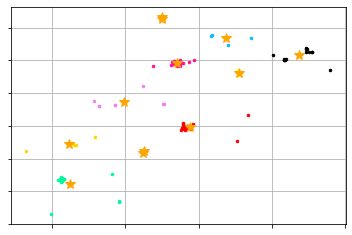

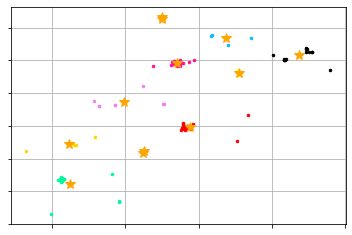

In [52]:
### PYCLUSTERING

sample = eda_ph[['szer','dlug']]
xmeans_list = []
for ix, row in sample.iterrows():
    szer = row["szer"]
    dlug = row["dlug"]
    xmeans_list.append([szer,dlug])

# MODEL

from pyclustering.cluster import cluster_visualizer
from pyclustering.cluster.xmeans import xmeans
from pyclustering.cluster.center_initializer import kmeans_plusplus_initializer

# Prepare initial centers - amount of initial centers defines amount of clusters from which X-Means will
# start analysis.
amount_initial_centers = 2
initial_centers = kmeans_plusplus_initializer(xmeans_list, amount_initial_centers).initialize()

# Create instance of X-Means algorithm. The algorithm will start analysis from 2 clusters, the maximum
# number of clusters that can be allocated is 20.
xmeans_instance = xmeans(xmeans_list, initial_centers, 20)
xmeans_instance.process()

# Extract clustering results: clusters and their centers
clusters = xmeans_instance.get_clusters()
centers = xmeans_instance.get_centers()

# Print total sum of metric errors
#print("Total WCE:", xmeans_instance.get_total_wce())

# Visualize clustering results
visualizer = cluster_visualizer()
visualizer.append_clusters(clusters, xmeans_list)
visualizer.append_cluster(centers, None, marker='*', markersize=10)
visualizer.show()